# Libraries importing



In [2]:
import csv
from datetime import date
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
from numpy import absolute
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor, MultiOutputClassifier
from xgboost import XGBRegressor, XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, root_mean_squared_error
from statistics import mean
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import linalg
from sklearn.gaussian_process import kernels,GaussianProcessRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error, mean_absolute_percentage_error
import seaborn as sns

In [3]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.layers import Reshape

# Data Loading

In [4]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

# Load the CSV file
file_path= '/content/drive/My Drive/shap_experiment/data'
df_processed_combined_data_daily = pd.read_csv(file_path+"/processed_combined_imputed_with_neighbors_df_processed_combined_data_daily.csv")

#df_aqi_daily.DateTime = pd.to_datetime(df_aqi_daily.DateTime)
df_processed_combined_data_daily.DateTime = pd.to_datetime(df_processed_combined_data_daily.DateTime)
df_PM10_daily = df_processed_combined_data_daily[['DateTime','Bjelave_PM10']]

Mounted at /content/drive


# Dataset Splitting

In [5]:
import matplotlib.pyplot as plt
def train_test_split(df, date):
    df = df.copy()
    train_data = df[df['DateTime'] < date].copy()
    test_data = df[df['DateTime'] >= date].copy() # df.DateTime = df.DateTime.dt.strftime('%d/%m/%Y %H:%M')
    return train_data, test_data

def train_test_split_from_to(df, start_date, end_date, slice_date):
    df = df.copy()
    train_data = df[(df['DateTime'] >= start_date) & (df['DateTime'] < slice_date)].copy()
    test_data = df[(df['DateTime'] >= slice_date) & (df['DateTime'] <= end_date)].copy()
    return train_data, test_data

def plot_train_test_data(train_data, test_data, date_column, label):
    plt.figure(figsize=(10,8))
    plt.plot(train_data[date_column], train_data[label], color='blue', label='Train Data')
    plt.plot(test_data[date_column], test_data[label], color='orange', label='Test Data')
    plt.xlabel(date_column)
    plt.ylabel(label)
    plt.title(label + ' Train and Test Data')
    plt.legend()
    plt.show()

In [6]:
def plot_boxplot(prediction_data, test_data):
    error = abs(prediction_data - test_data)
    # plot boxplot of error
    plt.figure(figsize=(10,6))
    plt.boxplot(error)
    plt.show()

In [7]:
#input window = 7
date = df_processed_combined_data_daily['DateTime'].max() - pd.Timedelta(days=2*7+ int(7/5 + 1))
train_data_combined_ws_week, test_data_combined_ws_week = train_test_split(df_processed_combined_data_daily, date) #
train_PM10_daily_ws_week, test_PM10_daily_ws_week = train_test_split(df_PM10_daily, date)

train_data_combined_ws_week_dt, test_data_combined_ws_week_dt = train_test_split(df_processed_combined_data_daily, date) #

#input window = 15 #i isti look back
date = df_processed_combined_data_daily['DateTime'].max() - pd.Timedelta(days=2*15+ int(15/5 + 1))
train_data_combined_ws_fifteen, test_data_combined_ws_fifteen = train_test_split(df_processed_combined_data_daily, date) #
train_PM10_daily_ws_fifteen, test_PM10_daily_ws_fifteen = train_test_split(df_PM10_daily, date)

train_data_combined_ws_fifteen_dt, test_data_combined_ws_fifteen_dt = train_test_split(df_processed_combined_data_daily, date) #

#input window = 30
date = df_processed_combined_data_daily['DateTime'].max() - pd.Timedelta(days=2*30+ int(30/5 + 1))
train_data_combined_ws_thirty, test_data_combined_ws_thirty = train_test_split(df_processed_combined_data_daily, date) #
train_PM10_daily_ws_thirty, test_PM10_daily_ws_thirty = train_test_split(df_PM10_daily, date)

train_data_combined_ws_thirty_dt, test_data_combined_ws_thirty_dt = train_test_split(df_processed_combined_data_daily, date) #

#input window = 60
date = df_processed_combined_data_daily['DateTime'].max() - pd.Timedelta(days=2*60+ int(60/5 + 1))
train_data_combined_ws_sixty, test_data_combined_ws_sixty = train_test_split(df_processed_combined_data_daily, date)
train_PM10_daily_ws_sixty, test_PM10_daily_ws_sixty = train_test_split(df_PM10_daily, date)

train_data_combined_ws_sixty_dt, test_data_combined_ws_sixty_dt = train_test_split(df_processed_combined_data_daily, date) #

#input window = 90
date = df_processed_combined_data_daily['DateTime'].max() - pd.Timedelta(days=2*90+ int(90/6 + 1))
train_data_combined_ws_ninety, test_data_combined_ws_ninety = train_test_split(df_processed_combined_data_daily, date)
train_PM10_daily_ws_ninety, test_PM10_daily_ws_ninety = train_test_split(df_PM10_daily, date)
train_data_combined_ws_ninety_dt, test_data_combined_ws_ninety_dt = train_test_split(df_processed_combined_data_daily, date) #


In [8]:
date = df_processed_combined_data_daily['DateTime'].max() - pd.Timedelta(days=60)
train_data, test_data = train_test_split(df_processed_combined_data_daily, date)

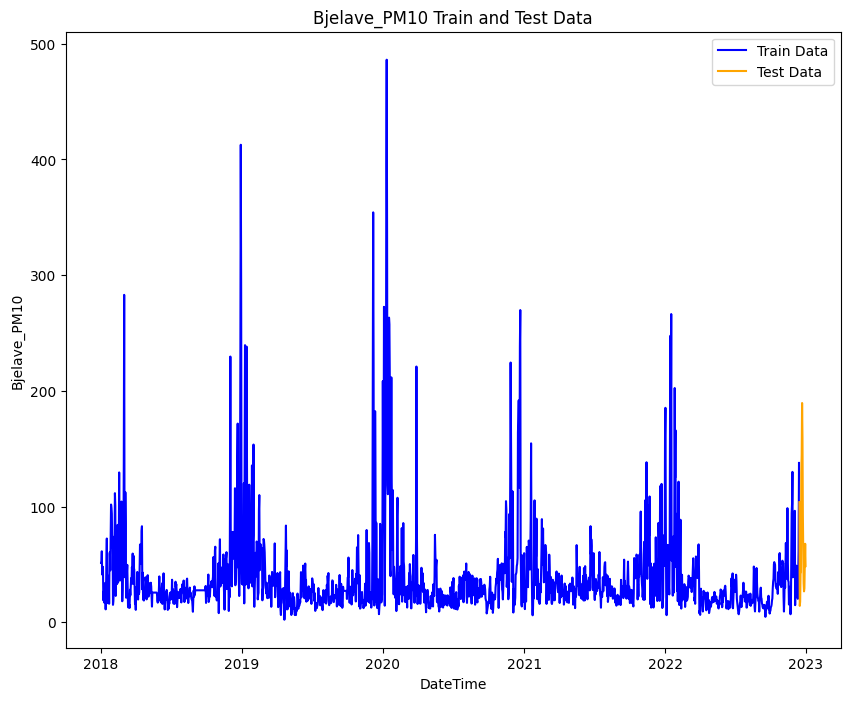

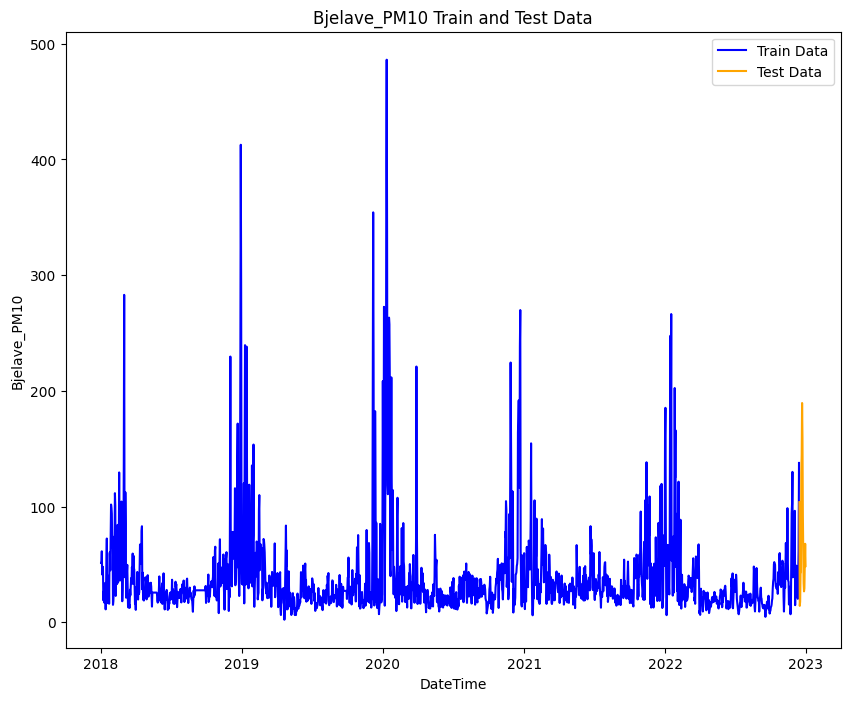

In [9]:
plot_train_test_data(train_data_combined_ws_week, test_data_combined_ws_week, 'DateTime', 'Bjelave_PM10')
plot_train_test_data(train_PM10_daily_ws_week, test_PM10_daily_ws_week, 'DateTime', 'Bjelave_PM10')

# Dataset Scaling

In [10]:
from sklearn.preprocessing import MinMaxScaler

train_data = train_data.set_index('DateTime')
test_data = test_data.set_index('DateTime')

scaler = MinMaxScaler(feature_range=(0,1))
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)


In [11]:
print(train_data.columns)

Index(['wind_speed', 'wind_direction', 'precipitation', 'pressure',
       'temperature', 'humidity', 'visibility', 'cloudiness', 'Bjelave_PM10',
       'Bjelave_SO2', 'Bjelave_NO2'],
      dtype='object')


In [12]:
print(train_data.columns)

Index(['wind_speed', 'wind_direction', 'precipitation', 'pressure',
       'temperature', 'humidity', 'visibility', 'cloudiness', 'Bjelave_PM10',
       'Bjelave_SO2', 'Bjelave_NO2'],
      dtype='object')


In [13]:
print(test_data.columns)

Index(['wind_speed', 'wind_direction', 'precipitation', 'pressure',
       'temperature', 'humidity', 'visibility', 'cloudiness', 'Bjelave_PM10',
       'Bjelave_SO2', 'Bjelave_NO2'],
      dtype='object')


In [14]:
print(test_data.columns.get_loc('Bjelave_PM10'))
index_of_target_feature=test_data.columns.get_loc('Bjelave_PM10')
print(test_data.columns)

8
Index(['wind_speed', 'wind_direction', 'precipitation', 'pressure',
       'temperature', 'humidity', 'visibility', 'cloudiness', 'Bjelave_PM10',
       'Bjelave_SO2', 'Bjelave_NO2'],
      dtype='object')


In [15]:
train_data_combined_ws_week = train_data_combined_ws_week.set_index('DateTime')
test_data_combined_ws_week = test_data_combined_ws_week.set_index('DateTime')

scaler_data_combined_ws_week = MinMaxScaler(feature_range=(0,1))
train_data_combined_ws_week_scaled = scaler_data_combined_ws_week.fit_transform(train_data_combined_ws_week)
test_data_combined_ws_week_scaled = scaler_data_combined_ws_week.transform(test_data_combined_ws_week)

train_data_combined_ws_week_dt = train_data_combined_ws_week_dt.set_index('DateTime')
test_data_combined_ws_week_dt = test_data_combined_ws_week_dt.set_index('DateTime')

scaler_data_combined_ws_week_dt = MinMaxScaler(feature_range=(0,1))
train_data_combined_ws_week_scaled_dt = scaler_data_combined_ws_week_dt.fit_transform(train_data_combined_ws_week_dt)
test_data_combined_ws_week_scaled_dt = scaler_data_combined_ws_week_dt.transform(test_data_combined_ws_week_dt)


In [16]:
test_data_combined_ws_week.shape

(17, 11)

In [17]:
train_data_combined_ws_fifteen_dt = train_data_combined_ws_fifteen_dt.set_index('DateTime')
test_data_combined_ws_fifteen_dt = test_data_combined_ws_fifteen_dt.set_index('DateTime')

scaler_data_combined_ws_fifteen_dt = MinMaxScaler(feature_range=(0,1))
train_data_combined_ws_fifteen_scaled_dt = scaler_data_combined_ws_fifteen_dt.fit_transform(train_data_combined_ws_fifteen_dt)
test_data_combined_ws_fifteen_scaled_dt = scaler_data_combined_ws_fifteen_dt.transform(test_data_combined_ws_fifteen_dt)

In [18]:
train_data_combined_ws_fifteen = train_data_combined_ws_fifteen.set_index('DateTime')
test_data_combined_ws_fifteen = test_data_combined_ws_fifteen.set_index('DateTime')

scaler_data_combined_ws_fifteen = MinMaxScaler(feature_range=(0,1))
train_data_combined_ws_fifteen_scaled = scaler_data_combined_ws_fifteen.fit_transform(train_data_combined_ws_fifteen)
test_data_combined_ws_fifteen_scaled = scaler_data_combined_ws_fifteen.transform(test_data_combined_ws_fifteen)

In [19]:
train_data_combined_ws_thirty_dt = train_data_combined_ws_thirty_dt.set_index('DateTime')
test_data_combined_ws_thirty_dt = test_data_combined_ws_thirty_dt.set_index('DateTime')

scaler_data_combined_ws_thirty_dt = MinMaxScaler(feature_range=(0,1))
train_data_combined_ws_thirty_scaled_dt = scaler_data_combined_ws_thirty_dt.fit_transform(train_data_combined_ws_thirty_dt)
test_data_combined_ws_thirty_scaled_dt = scaler_data_combined_ws_thirty_dt.transform(test_data_combined_ws_thirty_dt)

In [20]:
train_data_combined_ws_thirty = train_data_combined_ws_thirty.set_index('DateTime')
test_data_combined_ws_thirty = test_data_combined_ws_thirty.set_index('DateTime')

scaler_data_combined_ws_thirty = MinMaxScaler(feature_range=(0,1))
train_data_combined_ws_thirty_scaled = scaler_data_combined_ws_thirty.fit_transform(train_data_combined_ws_thirty)
test_data_combined_ws_thirty_scaled = scaler_data_combined_ws_thirty.transform(test_data_combined_ws_thirty)

In [21]:
train_data_combined_ws_sixty_dt = train_data_combined_ws_sixty_dt.set_index('DateTime')
test_data_combined_ws_sixty_dt = test_data_combined_ws_sixty_dt.set_index('DateTime')

scaler_data_combined_ws_sixty_dt = MinMaxScaler(feature_range=(0,1))
train_data_combined_ws_sixty_scaled_dt = scaler_data_combined_ws_sixty_dt.fit_transform(train_data_combined_ws_sixty_dt)
test_data_combined_ws_sixty_scaled_dt = scaler_data_combined_ws_sixty_dt.transform(test_data_combined_ws_sixty_dt)

In [22]:
train_data_combined_ws_sixty = train_data_combined_ws_sixty.set_index('DateTime')
test_data_combined_ws_sixty = test_data_combined_ws_sixty.set_index('DateTime')

scaler_data_combined_ws_sixty = MinMaxScaler(feature_range=(0,1))
train_data_combined_ws_sixty_scaled = scaler_data_combined_ws_sixty.fit_transform(train_data_combined_ws_sixty)
test_data_combined_ws_sixty_scaled = scaler_data_combined_ws_sixty.transform(test_data_combined_ws_sixty)

print("train_data_combined_ws_sixty_scaled.shape :", train_data_combined_ws_sixty_scaled.shape)
print("train_data_combined_ws_sixty.shape :", train_data_combined_ws_sixty.shape)

print("test_data_combined_ws_sixty_scaled.shape :", test_data_combined_ws_sixty_scaled.shape)
print("test_data_combined_ws_sixty.shape :", test_data_combined_ws_sixty.shape)

train_data_combined_ws_sixty_scaled.shape : (1692, 11)
train_data_combined_ws_sixty.shape : (1692, 11)
test_data_combined_ws_sixty_scaled.shape : (134, 11)
test_data_combined_ws_sixty.shape : (134, 11)


In [23]:
train_data_combined_ws_ninety = train_PM10_daily_ws_ninety.set_index('DateTime')
test_data_combined_ws_ninety = test_PM10_daily_ws_ninety.set_index('DateTime')

scaler_data_combined_ws_ninety = MinMaxScaler(feature_range=(0,1))
train_data_combined_ws_ninety_scaled = scaler_data_combined_ws_ninety.fit_transform(train_data_combined_ws_ninety)
test_data_combined_ws_ninety_scaled = scaler_data_combined_ws_ninety.transform(test_data_combined_ws_ninety)

In [24]:
train_PM10_daily_ws_week = train_PM10_daily_ws_week.set_index('DateTime')
test_PM10_daily_ws_week = test_PM10_daily_ws_week.set_index('DateTime')

scaler_PM10_daily_ws_week = MinMaxScaler(feature_range=(0,1))
train_PM10_daily_ws_week = scaler_PM10_daily_ws_week.fit_transform(train_PM10_daily_ws_week)
test_PM10_daily_ws_week = scaler_PM10_daily_ws_week.transform(test_PM10_daily_ws_week)

In [25]:
train_PM10_daily_ws_fifteen = train_PM10_daily_ws_fifteen.set_index('DateTime')
test_PM10_daily_ws_fifteen = test_PM10_daily_ws_fifteen.set_index('DateTime')

scaler_PM10_daily_ws_fifteen = MinMaxScaler(feature_range=(0,1))
train_PM10_daily_ws_fifteen = scaler_PM10_daily_ws_fifteen.fit_transform(train_PM10_daily_ws_fifteen)
test_PM10_daily_ws_fifteen = scaler_PM10_daily_ws_fifteen.transform(test_PM10_daily_ws_fifteen)

In [26]:
train_PM10_daily_ws_thirty = train_PM10_daily_ws_thirty.set_index('DateTime')
test_PM10_daily_ws_thirty = test_PM10_daily_ws_thirty.set_index('DateTime')

scaler_PM10_daily_ws_thirty = MinMaxScaler(feature_range=(0,1))
train_PM10_daily_ws_thirty = scaler_PM10_daily_ws_thirty.fit_transform(train_PM10_daily_ws_thirty)
test_PM10_daily_ws_thirty = scaler_PM10_daily_ws_thirty.transform(test_PM10_daily_ws_thirty)

In [27]:
train_PM10_daily_ws_sixty = train_PM10_daily_ws_sixty.set_index('DateTime')
test_PM10_daily_ws_sixty = test_PM10_daily_ws_sixty.set_index('DateTime')

scaler_PM10_daily_ws_sixty = MinMaxScaler(feature_range=(0,1))
train_PM10_daily_ws_sixty = scaler_PM10_daily_ws_sixty.fit_transform(train_PM10_daily_ws_sixty)
test_PM10_daily_ws_sixty = scaler_PM10_daily_ws_sixty.transform(test_PM10_daily_ws_sixty)

In [28]:
train_PM10_daily_ws_ninety = train_PM10_daily_ws_ninety.set_index('DateTime')
test_PM10_daily_ws_ninety = test_PM10_daily_ws_ninety.set_index('DateTime')

scaler_PM10_daily_ws_ninety = MinMaxScaler(feature_range=(0,1))
train_PM10_daily_ws_ninety = scaler_PM10_daily_ws_ninety.fit_transform(train_PM10_daily_ws_ninety)
test_PM10_daily_ws_ninety = scaler_PM10_daily_ws_ninety.transform(test_PM10_daily_ws_ninety)

In [29]:
train_data_combined_ws_ninety_dt = train_data_combined_ws_ninety_dt.set_index('DateTime')
test_data_combined_ws_ninety_dt = test_data_combined_ws_ninety_dt.set_index('DateTime')

scaler_data_combined_ws_ninety_dt = MinMaxScaler(feature_range=(0,1))
train_data_combined_ws_ninety_scaled_dt = scaler_data_combined_ws_ninety_dt.fit_transform(train_data_combined_ws_ninety_dt)
test_data_combined_ws_ninety_scaled_dt = scaler_data_combined_ws_ninety_dt.transform(test_data_combined_ws_ninety_dt)

# LSTM for Univariate Time Series Prediction

In [ ]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='train')
    # plt.plot(history.history['val_loss'], label='val')
    plt.title("Loss")
    plt.legend()
    plt.show()


def create_dataset(data, look_back=1):
    """
    Create LSTM dataset by splitting the input data into input sequences (X) and corresponding output values (Y).

    Parameters:
    - data: numpy array, input data.
    - look_back: int, number of previous time steps to use as input variables to predict the next time period (default is 1).

    Returns:
    - X: numpy array, input sequences.
    - Y: numpy array, corresponding output values.
    """
    X, Y = [], []
    for i in range(len(data)-look_back-1):
        X.append(data[i:(i+look_back), 0])
        Y.append(data[(i+look_back), 0])
    return np.array(X), np.array(Y)

def train_model(model, x_train, y_train):
    early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
    # x_val = x_train[-50:]
    # y_val = y_train[-50:]
    # x_train = x_train[:-50]
    # y_train = y_train[:-50]
    # history = model.fit(x_train, y_train, epochs=5, batch_size=256, validation_data=(x_val, y_val), callbacks=[early_stop])
    history = model.fit(x_train, y_train, epochs=15, batch_size=5, verbose=1, callbacks=[early_stop])
    return history


In [ ]:

def build_model(look_back, num_features, params):
	model = Sequential()
	model.add(LSTM(units=params["lstm_units"], return_sequences=True, input_shape=(look_back, num_features)))
	# model.add(Dropout(rate=params["dropout"]))
	model.add(LSTM(units=params["lstm_units"], return_sequences=True))
	# model.add(Dropout(rate=params["dropout"]))
	model.add(LSTM(units=params["lstm_units"], return_sequences=True))
	#model.add(LSTM(units=params["lstm_units"], return_sequences=True))
	#model.add(Dropout(rate=params["dropout"]))
	model.add(LSTM(units=params["lstm_units"], return_sequences=True))
	#model.add(Dropout(rate=params["dropout"]))
	model.add(LSTM(units=params["lstm_units"], return_sequences=True))
	#model.add(Dropout(rate=params["dropout"]))
	model.add(LSTM(units=params["lstm_units"], return_sequences=True))
	#model.add(Dropout(rate=params["dropout"]))
	#model.add(LSTM(units=params["lstm_units"], return_sequences=True))
	#model.add(LSTM(units=params["lstm_units2"], return_sequences=True))
	model.add(LSTM(units=params["lstm_units1"], return_sequences=False))
	model.add(Dense(1))
	model.compile(loss=params["loss"], optimizer=params["optimizer"], metrics=[RootMeanSquaredError(), MeanAbsoluteError()])

	return model


In [ ]:
# Prepare input and output for LSTM model
look_back = 3
#x_train, y_train = create_dataset(train_data, look_back)

x_train_PM10_daily_ws_week, y_train_PM10_daily_ws_week = create_dataset(train_PM10_daily_ws_week, look_back)
x_train_PM10_daily_ws_fifteen, y_train_PM10_daily_ws_fifteen = create_dataset(train_PM10_daily_ws_fifteen, look_back)
x_train_PM10_daily_ws_thirty, y_train_PM10_daily_ws_thirty = create_dataset(train_PM10_daily_ws_thirty, look_back)
x_train_PM10_daily_ws_sixty, y_train_PM10_daily_ws_sixty = create_dataset(train_PM10_daily_ws_sixty, look_back)
x_train_PM10_daily_ws_ninety, y_train_PM10_daily_ws_ninety = create_dataset(train_PM10_daily_ws_ninety, look_back)

x_test_PM10_daily_ws_week, y_test_PM10_daily_ws_week = create_dataset(test_PM10_daily_ws_week, look_back)
x_test_PM10_daily_ws_fifteen, y_test_PM10_daily_ws_fifteen = create_dataset(test_PM10_daily_ws_fifteen, look_back)
x_test_PM10_daily_ws_thirty, y_test_PM10_daily_ws_thirty = create_dataset(test_PM10_daily_ws_thirty, look_back)
x_test_PM10_daily_ws_sixty, y_test_PM10_daily_ws_sixty = create_dataset(test_PM10_daily_ws_sixty, look_back)
x_test_PM10_daily_ws_ninety, y_test_PM10_daily_ws_ninety = create_dataset(test_PM10_daily_ws_ninety, look_back)

In [ ]:
x_train_PM10_daily_ws_thirty.shape

(1754, 3)

In [ ]:
# reshape input to be [samples, time steps, features]
#x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
num_features=1
x_train_PM10_daily_ws_week = np.reshape(x_train_PM10_daily_ws_week, (x_train_PM10_daily_ws_week.shape[0], look_back, num_features))
x_train_PM10_daily_ws_fifteen = np.reshape(x_train_PM10_daily_ws_fifteen, (x_train_PM10_daily_ws_fifteen.shape[0], look_back, num_features))
x_train_PM10_daily_ws_thirty = np.reshape(x_train_PM10_daily_ws_thirty, (x_train_PM10_daily_ws_thirty.shape[0], look_back, num_features))
x_train_PM10_daily_ws_sixty = np.reshape(x_train_PM10_daily_ws_sixty, (x_train_PM10_daily_ws_sixty.shape[0], look_back, num_features))
x_train_PM10_daily_ws_ninety = np.reshape(x_train_PM10_daily_ws_ninety, (x_train_PM10_daily_ws_ninety.shape[0], look_back, num_features))

x_test_PM10_daily_ws_week = np.reshape(x_test_PM10_daily_ws_week, (x_test_PM10_daily_ws_week.shape[0], look_back, num_features))
x_test_PM10_daily_ws_fifteen = np.reshape(x_test_PM10_daily_ws_fifteen, (x_test_PM10_daily_ws_fifteen.shape[0], look_back, num_features))
x_test_PM10_daily_ws_thirty = np.reshape(x_test_PM10_daily_ws_thirty, (x_test_PM10_daily_ws_thirty.shape[0], look_back, num_features))
x_test_PM10_daily_ws_sixty = np.reshape(x_test_PM10_daily_ws_sixty, (x_test_PM10_daily_ws_sixty.shape[0], look_back, num_features))
x_test_PM10_daily_ws_ninety = np.reshape(x_test_PM10_daily_ws_ninety, (x_test_PM10_daily_ws_ninety.shape[0], look_back, num_features))

In [ ]:
# Training the model
params = {
	"loss": "mean_squared_error",
	"optimizer": "adam",
  "dropout": 0.1,
	"lstm_units": 100,
	"lstm_units3": 90,
	"lstm_units2": 85,
	"lstm_units1": 85,
	"lstm_units0": 40
}

In [ ]:
x_train_PM10_daily_ws_thirty.shape

(1754, 3, 1)

In [ ]:
y_train_PM10_daily_ws_thirty.shape

(1754,)

**7-Day Prediction Window**

Epoch 1/15
361/361 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - loss: 0.0076 - mean_absolute_error: 0.0477 - root_mean_squared_error: 0.0868
Epoch 2/15
361/361 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 0.0055 - mean_absolute_error: 0.0423 - root_mean_squared_error: 0.0732
Epoch 3/15
361/361 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 0.0060 - mean_absolute_error: 0.0429 - root_mean_squared_error: 0.0766
Epoch 4/15
361/361 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 0.0079 - mean_absolute_error: 0.0486 - root_mean_squared_error: 0.0885
Epoch 5/15
361/361 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 0.0048 - mean_absolute_error: 0.0393 - root_mean_squared_error: 0.0686
Epoch 6/15
361/361 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.0062 - mean_absolute_error: 0.0448 - root_mean_squared_error: 0.0780
Epoch 7/15
361/361 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0055 - mean_absolute_error: 0.0395 - root_mean_squared_error: 0.0737
Epoch 8/15
361/361 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0037 - mean

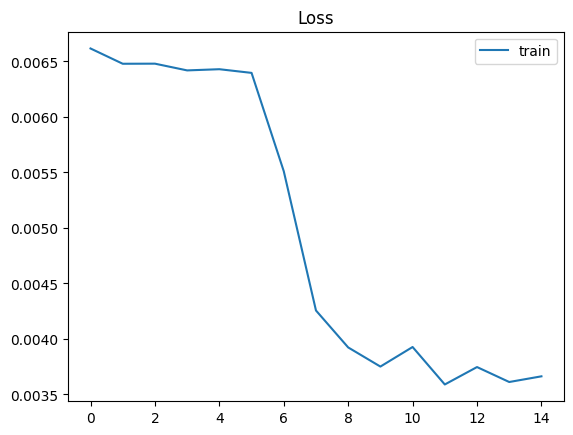

In [ ]:
model = build_model(look_back, num_features, params)
history = train_model(model, x_train_PM10_daily_ws_week, y_train_PM10_daily_ws_week)
plot_loss(history)

In [ ]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_48 (LSTM)                  │ (None, 3, 100)         │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_49 (LSTM)                  │ (None, 3, 100)         │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_50 (LSTM)                  │ (None, 3, 100)         │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_51 (LSTM)                  │ (None, 3, 100)         │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_52 (LSTM)                  │ (None, 3, 100)         │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_53 (LSTM)                  │ (None, 3, 100)         │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_54 (LSTM)                  │ (None, 85)             │        63,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            86 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,518,380 (5.79 MB)

 Trainable params: 506,126 (1.93 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,012,254 (3.86 MB)

In [ ]:
testPredict_PM10_daily_ws_week_scaled = model.predict(x_test_PM10_daily_ws_week)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 917ms/step


In [ ]:
testPredict_PM10_daily_ws_week = scaler_PM10_daily_ws_week.inverse_transform(testPredict_PM10_daily_ws_week_scaled)

In [ ]:
y_test_PM10_daily_ws_week_unscaled = scaler_PM10_daily_ws_thirty.inverse_transform(y_test_PM10_daily_ws_week.reshape(-1, 1))

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test_PM10_daily_ws_week_unscaled, testPredict_PM10_daily_ws_week))
mae = mean_absolute_error(y_test_PM10_daily_ws_week_unscaled, testPredict_PM10_daily_ws_week)
r2 = r2_score(y_test_PM10_daily_ws_week_unscaled, testPredict_PM10_daily_ws_week)

print("RMSE:", rmse)
print("MAE:", mae)
print("R2 Score:", r2)

RMSE: 42.97625560810566
MAE: 30.640040922291174
R2 Score: 0.3450138612556446


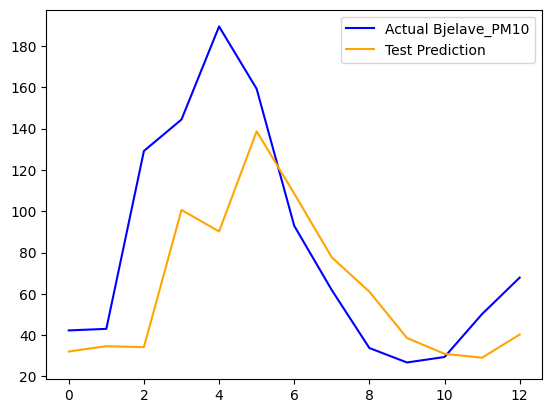

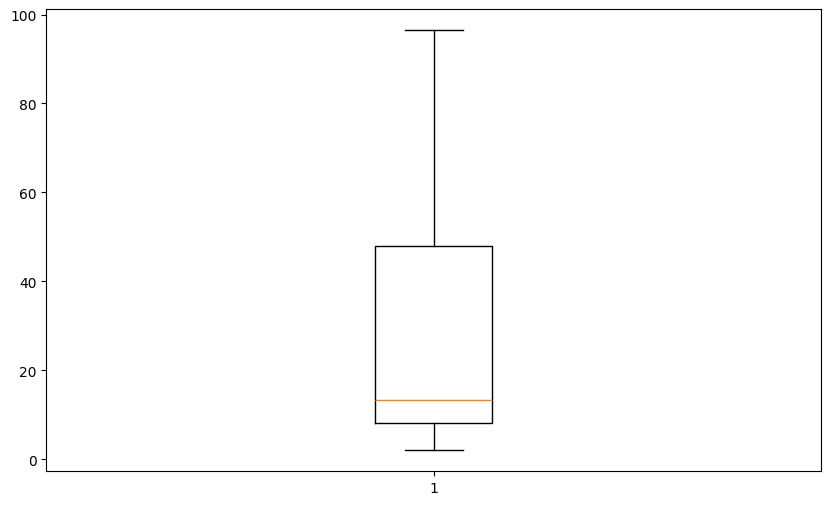

In [ ]:
plt.plot(y_test_PM10_daily_ws_week_unscaled, label='Actual Bjelave_PM10', color='blue')
plt.plot(testPredict_PM10_daily_ws_week, label='Test Prediction', color='orange')
plt.legend()
plt.show()

plot_boxplot(testPredict_PM10_daily_ws_week, y_test_PM10_daily_ws_week_unscaled[0])

In [ ]:
last_sequence = x_train_PM10_daily_ws_week[-1:]

In [ ]:
walk_forward_predictions_scaled = []

In [ ]:
for _ in range(len(y_test_PM10_daily_ws_week)):
    next_pred_scaled = model.predict(last_sequence, verbose=0)
    walk_forward_predictions_scaled.append(next_pred_scaled[0, 0])
    new_sequence_step = next_pred_scaled.reshape(1, 1, num_features)
    last_sequence = np.append(last_sequence[:, 1:, :], new_sequence_step, axis=1)

In [ ]:
walk_forward_predictions_unscaled = scaler_PM10_daily_ws_week.inverse_transform(np.array(walk_forward_predictions_scaled).reshape(-1, 1))

In [ ]:
rmse_wf = np.sqrt(mean_squared_error(y_test_PM10_daily_ws_week_unscaled, walk_forward_predictions_unscaled))
mae_wf = mean_absolute_error(y_test_PM10_daily_ws_week_unscaled, walk_forward_predictions_unscaled)
r2_wf = r2_score(y_test_PM10_daily_ws_week_unscaled, walk_forward_predictions_unscaled)

print("RMSE:", rmse_wf)
print("MAE:", mae_wf)
print("R2 Score:", r2_wf)

RMSE: 75.29117080794305
MAE: 53.47955321544656
R2 Score: -1.0103101365133003


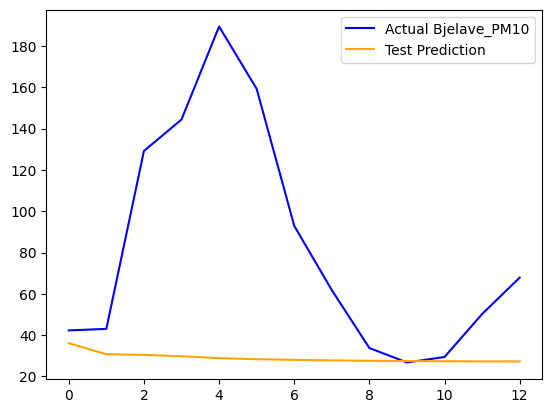

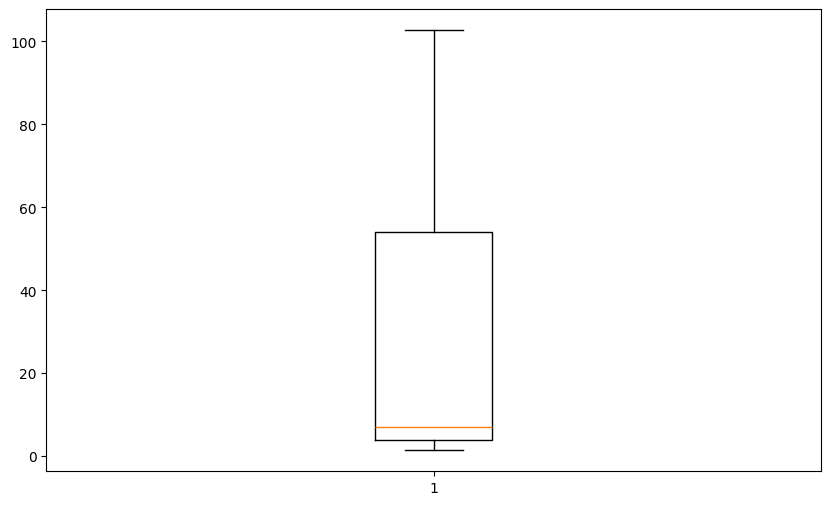

In [ ]:
plt.plot(y_test_PM10_daily_ws_week_unscaled, label='Actual Bjelave_PM10', color='blue')
plt.plot(walk_forward_predictions_unscaled, label='Test Prediction', color='orange')
plt.legend()
plt.show()

plot_boxplot(testPredict_PM10_daily_ws_week, walk_forward_predictions_unscaled[0])

**15-Day Prediction Window**

Epoch 1/15


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


358/358 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - loss: 0.0067 - mean_absolute_error: 0.0456 - root_mean_squared_error: 0.0811
Epoch 2/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0071 - mean_absolute_error: 0.0454 - root_mean_squared_error: 0.0839
Epoch 3/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0068 - mean_absolute_error: 0.0474 - root_mean_squared_error: 0.0820
Epoch 4/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.0066 - mean_absolute_error: 0.0459 - root_mean_squared_error: 0.0811
Epoch 5/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - loss: 0.0053 - mean_absolute_error: 0.0402 - root_mean_squared_error: 0.0722
Epoch 6/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0060 - mean_absolute_error: 0.0405 - root_mean_squared_error: 0.0768
Epoch 7/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.0036 - mean_absolute_error: 0.0335 - root_mean_squared_error: 0.0599
Epoch 8/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 0.0031 - mean_absolute_e

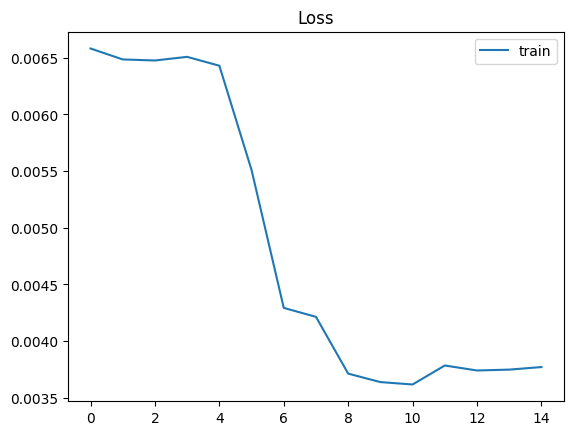

In [ ]:
model = build_model(look_back, num_features, params)
history = train_model(model, x_train_PM10_daily_ws_fifteen, y_train_PM10_daily_ws_fifteen)
plot_loss(history)

In [ ]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_55 (LSTM)                  │ (None, 3, 100)         │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_56 (LSTM)                  │ (None, 3, 100)         │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_57 (LSTM)                  │ (None, 3, 100)         │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_58 (LSTM)                  │ (None, 3, 100)         │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_59 (LSTM)                  │ (None, 3, 100)         │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_60 (LSTM)                  │ (None, 3, 100)         │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_61 (LSTM)                  │ (None, 85)             │        63,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            86 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,518,380 (5.79 MB)

 Trainable params: 506,126 (1.93 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,012,254 (3.86 MB)

In [ ]:
testPredict_PM10_daily_ws_fifteen_scaled = model.predict(x_test_PM10_daily_ws_fifteen)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 930ms/step


In [ ]:
testPredict_PM10_daily_ws_fifteen = scaler_PM10_daily_ws_fifteen.inverse_transform(testPredict_PM10_daily_ws_fifteen_scaled)

In [ ]:
y_test_PM10_daily_ws_fifteen_unscaled = scaler_PM10_daily_ws_fifteen.inverse_transform(y_test_PM10_daily_ws_fifteen.reshape(-1, 1))

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test_PM10_daily_ws_fifteen_unscaled, testPredict_PM10_daily_ws_fifteen))
mae = mean_absolute_error(y_test_PM10_daily_ws_fifteen_unscaled, testPredict_PM10_daily_ws_fifteen)
r2 = r2_score(y_test_PM10_daily_ws_fifteen_unscaled, testPredict_PM10_daily_ws_fifteen)

print("RMSE:", rmse)
print("MAE:", mae)
print("R2 Score:", r2)

RMSE: 38.84046921574927
MAE: 26.970909452907893
R2 Score: 0.27094015119109083


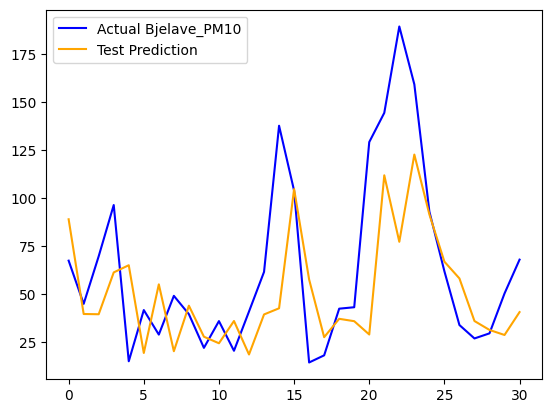

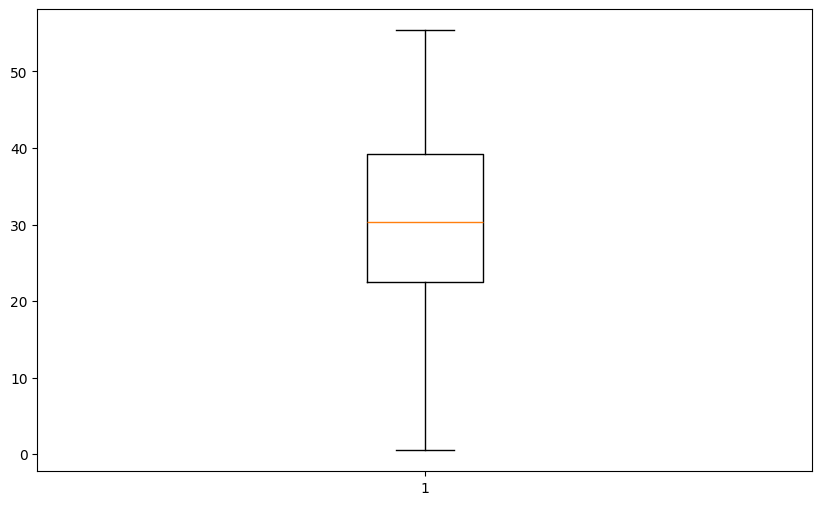

In [ ]:
plt.plot(y_test_PM10_daily_ws_fifteen_unscaled, label='Actual Bjelave_PM10', color='blue')
plt.plot(testPredict_PM10_daily_ws_fifteen, label='Test Prediction', color='orange')
plt.legend()
plt.show()

plot_boxplot(testPredict_PM10_daily_ws_fifteen, y_test_PM10_daily_ws_fifteen_unscaled[0])

In [ ]:
last_sequence = x_train_PM10_daily_ws_fifteen[-1:]

In [ ]:
walk_forward_predictions_scaled = []

In [ ]:
for _ in range(len(y_test_PM10_daily_ws_fifteen)):
    next_pred_scaled = model.predict(last_sequence, verbose=0)
    walk_forward_predictions_scaled.append(next_pred_scaled[0, 0])
    new_sequence_step = next_pred_scaled.reshape(1, 1, num_features)
    last_sequence = np.append(last_sequence[:, 1:, :], new_sequence_step, axis=1)

In [ ]:
walk_forward_predictions_unscaled = scaler_PM10_daily_ws_fifteen.inverse_transform(np.array(walk_forward_predictions_scaled).reshape(-1, 1))

In [ ]:
rmse_wf = np.sqrt(mean_squared_error(y_test_PM10_daily_ws_fifteen_unscaled, walk_forward_predictions_unscaled))
mae_wf = mean_absolute_error(y_test_PM10_daily_ws_fifteen_unscaled, walk_forward_predictions_unscaled)
r2_wf = r2_score(y_test_PM10_daily_ws_fifteen_unscaled, walk_forward_predictions_unscaled)

print("RMSE:", rmse_wf)
print("MAE:", mae_wf)
print("R2 Score:", r2_wf)

RMSE: 60.115464470679925
MAE: 41.12200998909539
R2 Score: -0.7464922366246838


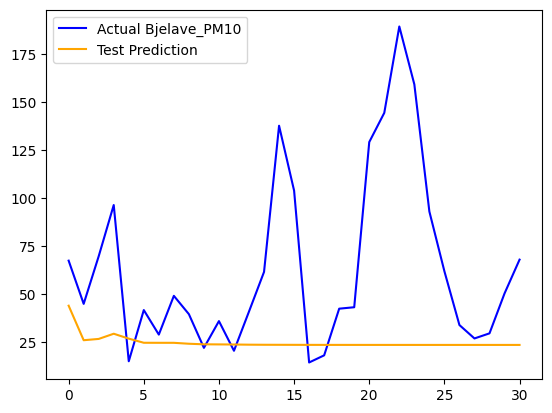

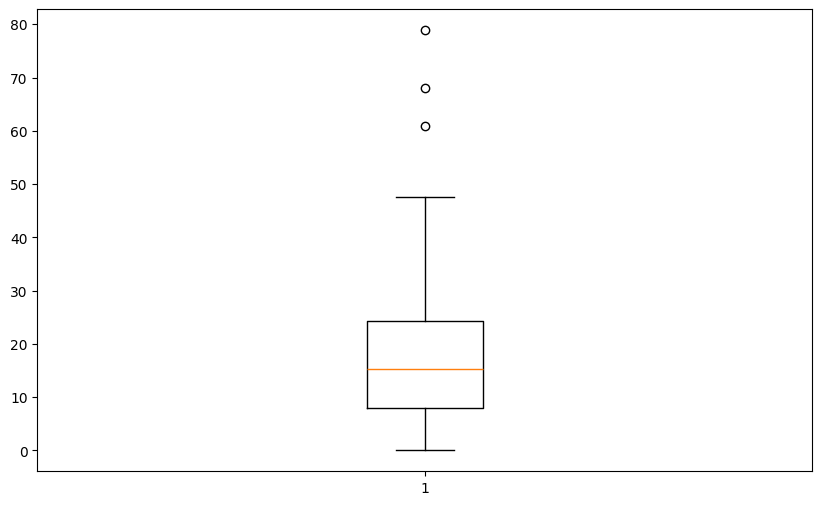

In [ ]:
plt.plot(y_test_PM10_daily_ws_fifteen_unscaled, label='Actual Bjelave_PM10', color='blue')
plt.plot(walk_forward_predictions_unscaled, label='Test Prediction', color='orange')
plt.legend()
plt.show()

plot_boxplot(testPredict_PM10_daily_ws_fifteen, walk_forward_predictions_unscaled[0])

**30 Day Prediction Window**

Epoch 1/15


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


351/351 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - loss: 0.0066 - mean_absolute_error: 0.0445 - root_mean_squared_error: 0.0806
Epoch 2/15
351/351 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.0078 - mean_absolute_error: 0.0472 - root_mean_squared_error: 0.0877
Epoch 3/15
351/351 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 0.0067 - mean_absolute_error: 0.0472 - root_mean_squared_error: 0.0817
Epoch 4/15
351/351 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.0054 - mean_absolute_error: 0.0413 - root_mean_squared_error: 0.0726
Epoch 5/15
351/351 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0059 - mean_absolute_error: 0.0420 - root_mean_squared_error: 0.0758
Epoch 6/15
351/351 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - loss: 0.0068 - mean_absolute_error: 0.0432 - root_mean_squared_error: 0.0809
Epoch 7/15
351/351 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - loss: 0.0042 - mean_absolute_error: 0.0347 - root_mean_squared_error: 0.0645
Epoch 8/15
351/351 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.0057 - mean_absolute_

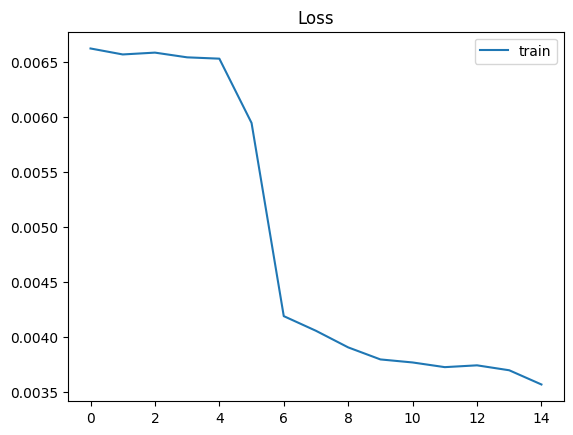

In [ ]:
model = build_model(look_back, num_features, params)
history = train_model(model, x_train_PM10_daily_ws_thirty, y_train_PM10_daily_ws_thirty)
plot_loss(history)

In [ ]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_62 (LSTM)                  │ (None, 3, 100)         │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_63 (LSTM)                  │ (None, 3, 100)         │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_64 (LSTM)                  │ (None, 3, 100)         │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_65 (LSTM)                  │ (None, 3, 100)         │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_66 (LSTM)                  │ (None, 3, 100)         │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_67 (LSTM)                  │ (None, 3, 100)         │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_68 (LSTM)                  │ (None, 85)             │        63,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            86 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,518,380 (5.79 MB)

 Trainable params: 506,126 (1.93 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,012,254 (3.86 MB)

In [ ]:
testPredict_PM10_daily_ws_thirty_scaled = model.predict(x_test_PM10_daily_ws_thirty)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step 


In [ ]:
testPredict_PM10_daily_ws_thirty = scaler_PM10_daily_ws_thirty.inverse_transform(testPredict_PM10_daily_ws_thirty_scaled)

In [ ]:
y_test_PM10_daily_ws_thirty_unscaled = scaler_PM10_daily_ws_thirty.inverse_transform(y_test_PM10_daily_ws_thirty.reshape(-1, 1))

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test_PM10_daily_ws_thirty_unscaled, testPredict_PM10_daily_ws_thirty))
mae = mean_absolute_error(y_test_PM10_daily_ws_thirty_unscaled, testPredict_PM10_daily_ws_thirty)
r2 = r2_score(y_test_PM10_daily_ws_thirty_unscaled, testPredict_PM10_daily_ws_thirty)

print("RMSE:", rmse)
print("MAE:", mae)
print("R2 Score:", r2)
# previous results:
# RMSE: 36.51894921522029
# MAE: 26.330601179172024
# R2 Score: 0.3554883214703234

RMSE: 32.88475460571248
MAE: 23.037171679828376
R2 Score: 0.2749998178988323


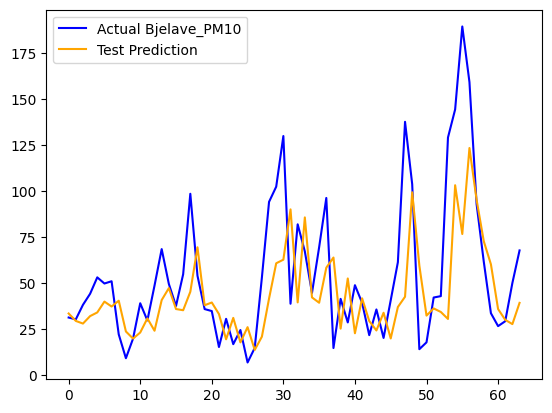

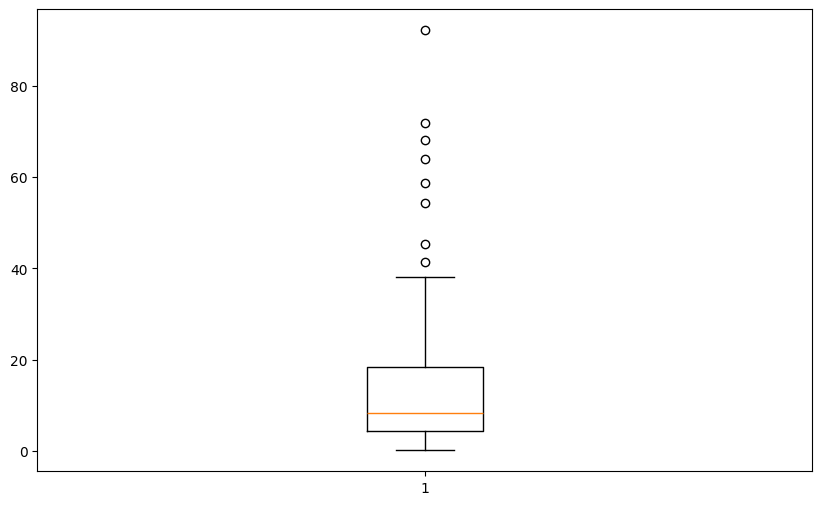

In [ ]:
plt.plot(y_test_PM10_daily_ws_thirty_unscaled, label='Actual Bjelave_PM10', color='blue')
plt.plot(testPredict_PM10_daily_ws_thirty, label='Test Prediction', color='orange')
plt.legend()
plt.show()

plot_boxplot(testPredict_PM10_daily_ws_thirty, y_test_PM10_daily_ws_thirty_unscaled[0])

In [ ]:
last_sequence = x_train_PM10_daily_ws_thirty[-1:]

In [ ]:
walk_forward_predictions_scaled = []

In [ ]:
for _ in range(len(y_test_PM10_daily_ws_thirty)):
    next_pred_scaled = model.predict(last_sequence, verbose=0)
    walk_forward_predictions_scaled.append(next_pred_scaled[0, 0])
    new_sequence_step = next_pred_scaled.reshape(1, 1, num_features)
    last_sequence = np.append(last_sequence[:, 1:, :], new_sequence_step, axis=1)

In [ ]:
walk_forward_predictions_unscaled = scaler_PM10_daily_ws_thirty.inverse_transform(np.array(walk_forward_predictions_scaled).reshape(-1, 1))

In [ ]:
rmse_wf = np.sqrt(mean_squared_error(y_test_PM10_daily_ws_thirty_unscaled, walk_forward_predictions_unscaled))
mae_wf = mean_absolute_error(y_test_PM10_daily_ws_thirty_unscaled, walk_forward_predictions_unscaled)
r2_wf = r2_score(y_test_PM10_daily_ws_thirty_unscaled, walk_forward_predictions_unscaled)

print("RMSE:", rmse_wf)
print("MAE:", mae_wf)
print("R2 Score:", r2_wf)
# previous results:
# RMSE: 50.21773309961082
# MAE: 32.88232332502168
# R2 Score: -0.21873267183859202

RMSE: 49.92042042841904
MAE: 33.97414522707844
R2 Score: -0.670726547371628


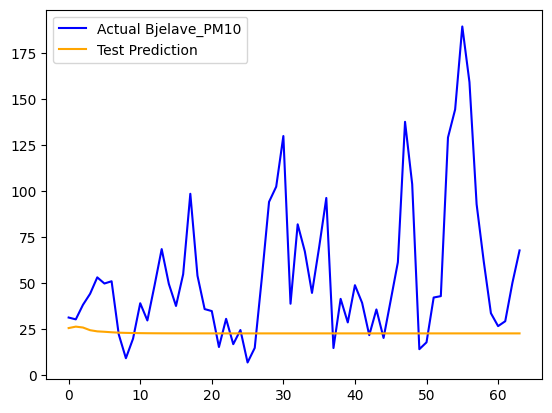

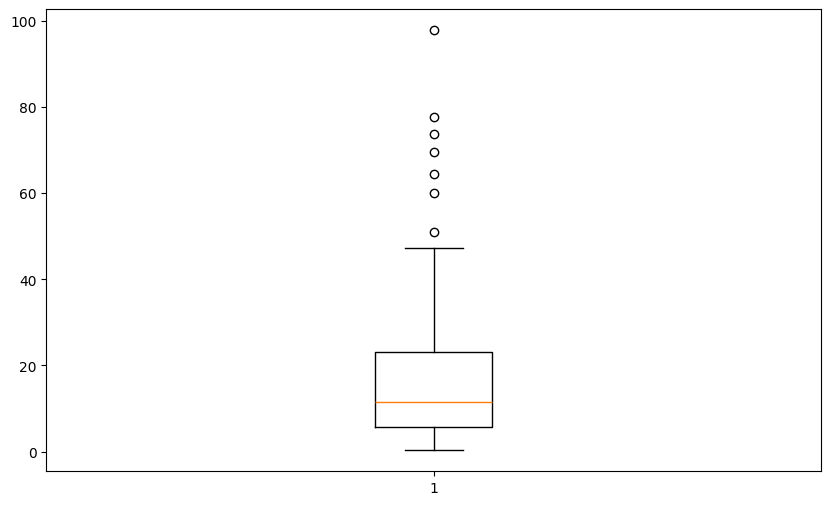

In [ ]:
plt.plot(y_test_PM10_daily_ws_thirty_unscaled, label='Actual Bjelave_PM10', color='blue')
plt.plot(walk_forward_predictions_unscaled, label='Test Prediction', color='orange')
plt.legend()
plt.show()

plot_boxplot(testPredict_PM10_daily_ws_thirty, walk_forward_predictions_unscaled[0])

**60-Day Prediction Window**

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
338/338 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - loss: 0.0071 - mean_absolute_error: 0.0475 - root_mean_squared_error: 0.0838
Epoch 2/15
338/338 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - loss: 0.0062 - mean_absolute_error: 0.0451 - root_mean_squared_error: 0.0785
Epoch 3/15
338/338 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - loss: 0.0073 - mean_absolute_error: 0.0459 - root_mean_squared_error: 0.0844
Epoch 4/15
338/338 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - loss: 0.0066 - mean_absolute_error: 0.0448 - root_mean_squared_error: 0.0802
Epoch 5/15
338/338 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.0071 - mean_absolute_error: 0.0452 - root_mean_squared_error: 0.0836
Epoch 6/15
338/338 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - loss: 0.0050 - mean_absolute_error: 0.0395 - root_mean_squared_error: 0.0701
Epoch 7/15
338/338 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 0.0042 - mean_absolute_error: 0.0373 - root_mean_squared_error: 0.0648
Epoch 8/15
338/338 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 0.0055 - 

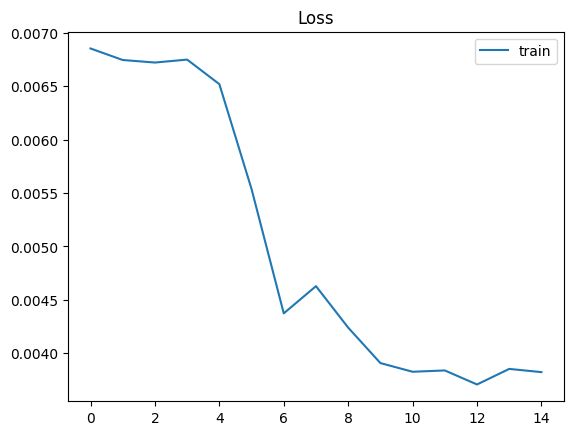

In [ ]:
model = build_model(look_back, num_features, params)
history = train_model(model, x_train_PM10_daily_ws_sixty, y_train_PM10_daily_ws_sixty)
plot_loss(history)

In [ ]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_69 (LSTM)                  │ (None, 3, 100)         │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_70 (LSTM)                  │ (None, 3, 100)         │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_71 (LSTM)                  │ (None, 3, 100)         │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_72 (LSTM)                  │ (None, 3, 100)         │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_73 (LSTM)                  │ (None, 3, 100)         │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_74 (LSTM)                  │ (None, 3, 100)         │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_75 (LSTM)                  │ (None, 85)             │        63,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            86 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,518,380 (5.79 MB)

 Trainable params: 506,126 (1.93 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,012,254 (3.86 MB)

In [ ]:
testPredict_PM10_daily_ws_sixty_scaled = model.predict(x_test_PM10_daily_ws_sixty)

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 239ms/step


In [ ]:
testPredict_PM10_daily_ws_sixty = scaler_PM10_daily_ws_sixty.inverse_transform(testPredict_PM10_daily_ws_sixty_scaled)

In [ ]:
y_test_PM10_daily_ws_sixty_unscaled = scaler_PM10_daily_ws_sixty.inverse_transform(y_test_PM10_daily_ws_sixty.reshape(-1, 1))

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test_PM10_daily_ws_sixty_unscaled, testPredict_PM10_daily_ws_sixty))
mae = mean_absolute_error(y_test_PM10_daily_ws_sixty_unscaled, testPredict_PM10_daily_ws_sixty)
r2 = r2_score(y_test_PM10_daily_ws_sixty_unscaled, testPredict_PM10_daily_ws_sixty)

print("RMSE:", rmse)
print("MAE:", mae)
print("R2 Score:", r2)

RMSE: 23.263860711765595
MAE: 14.91316426908322
R2 Score: 0.48486654177044086


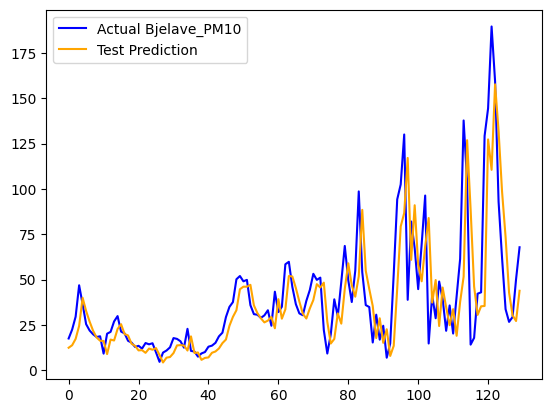

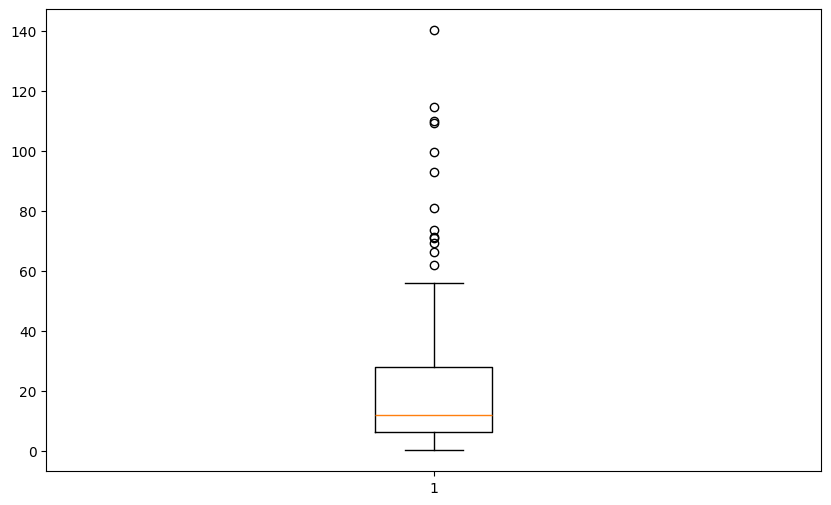

In [ ]:
plt.plot(y_test_PM10_daily_ws_sixty_unscaled, label='Actual Bjelave_PM10', color='blue')
plt.plot(testPredict_PM10_daily_ws_sixty, label='Test Prediction', color='orange')
plt.legend()
plt.show()

plot_boxplot(testPredict_PM10_daily_ws_sixty, y_test_PM10_daily_ws_sixty_unscaled[0])

In [ ]:
last_sequence = x_train_PM10_daily_ws_sixty[-1:]

In [ ]:
walk_forward_predictions_scaled = []

In [ ]:
for _ in range(len(y_test_PM10_daily_ws_sixty)):
    next_pred_scaled = model.predict(last_sequence, verbose=0)
    walk_forward_predictions_scaled.append(next_pred_scaled[0, 0])
    new_sequence_step = next_pred_scaled.reshape(1, 1, num_features)
    last_sequence = np.append(last_sequence[:, 1:, :], new_sequence_step, axis=1)

In [ ]:
walk_forward_predictions_unscaled = scaler_PM10_daily_ws_sixty.inverse_transform(np.array(walk_forward_predictions_scaled).reshape(-1, 1))

In [ ]:
rmse_wf = np.sqrt(mean_squared_error(y_test_PM10_daily_ws_sixty_unscaled, walk_forward_predictions_unscaled))
mae_wf = mean_absolute_error(y_test_PM10_daily_ws_sixty_unscaled, walk_forward_predictions_unscaled)
r2_wf = r2_score(y_test_PM10_daily_ws_sixty_unscaled, walk_forward_predictions_unscaled)

print("RMSE:", rmse_wf)
print("MAE:", mae_wf)
print("R2 Score:", r2_wf)

RMSE: 73.26462892386542
MAE: 63.14714060352458
R2 Score: -4.1091057181491415


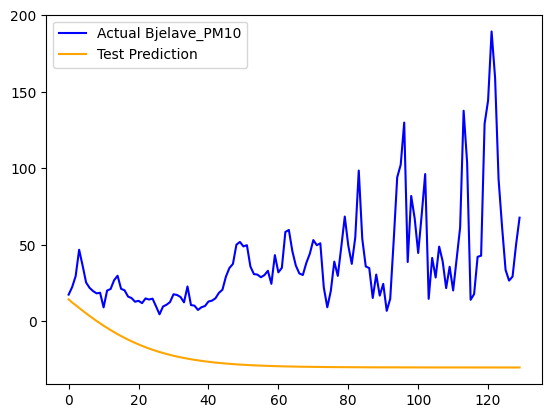

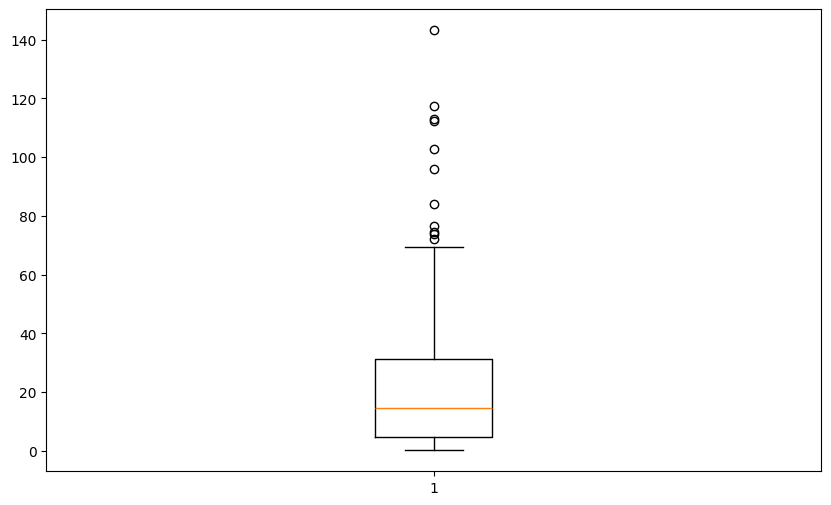

In [ ]:
plt.plot(y_test_PM10_daily_ws_sixty_unscaled, label='Actual Bjelave_PM10', color='blue')
plt.plot(walk_forward_predictions_unscaled, label='Test Prediction', color='orange')
plt.legend()
plt.show()

plot_boxplot(testPredict_PM10_daily_ws_sixty, walk_forward_predictions_unscaled[0])

# LSTM for Direct Multi-step Time Series Prediction

In [30]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='train')
    # plt.plot(history.history['val_loss'], label='val')
    plt.title("Loss")
    plt.legend()
    plt.show()


def create_training_dataset(data, target_column_index, look_back=3, horizon=7):
    X, Y = [], []
    for i in range(len(data) - look_back - horizon + 1):
        X.append(data[i:(i + look_back), :])
        Y.append(data[(i + look_back):(i + look_back + horizon), target_column_index])
    return np.array(X), np.array(Y)

def train_multivariate_model(model, x_train, y_train):
    early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
    # x_val = x_train[-50:]
    # y_val = y_train[-50:]
    # x_train = x_train[:-50]
    # y_train = y_train[:-50]
    # history = model.fit(x_train, y_train, epochs=5, batch_size=256, validation_data=(x_val, y_val), callbacks=[early_stop])
    history = model.fit(x_train, y_train, epochs=20, batch_size=6, verbose=1, callbacks=[early_stop])
    return history

def denormalize_prediction(prediction, scaler, target_column_index, num_features):
    full_data = np.zeros((len(prediction), num_features))
    full_data[:, target_column_index] = prediction
    denormalized = scaler.inverse_transform(full_data)
    return denormalized[:, target_column_index]

def evaluate_forecasts(actual_data, predicted_data):
  rmse = np.sqrt(mean_squared_error(actual_data, predicted_data))
  mae = mean_absolute_error(actual_data, predicted_data)
  r2 = r2_score(actual_data, predicted_data)
  print("RMSE:", rmse)
  print("MAE:", mae)
  print("R2 Score:", r2)
  return rmse, mae, r2

In [31]:

def build_multivariate_multistep_model(look_back, num_features, params):
	model = Sequential()
	model.add(LSTM(units=params["lstm_units"], return_sequences=True, input_shape=(look_back, num_features)))
	# model.add(Dropout(rate=params["dropout"]))
	model.add(LSTM(units=params["lstm_units"], return_sequences=True))
	# model.add(Dropout(rate=params["dropout"]))
	model.add(LSTM(units=params["lstm_units"], return_sequences=True))
	#model.add(LSTM(units=params["lstm_units"], return_sequences=True))
	#model.add(Dropout(rate=params["dropout"]))
	model.add(LSTM(units=params["lstm_units"], return_sequences=True))
	#model.add(Dropout(rate=params["dropout"]))
	#model.add(LSTM(units=params["lstm_units"], return_sequences=True))
	#model.add(Dropout(rate=params["dropout"]))
	model.add(LSTM(units=params["lstm_units"], return_sequences=True))
	#model.add(Dropout(rate=params["dropout"]))
	#model.add(LSTM(units=params["lstm_units"], return_sequences=True))
	#model.add(LSTM(units=params["lstm_units2"], return_sequences=True))
	model.add(LSTM(units=params["lstm_units1"], return_sequences=False))
	model.add(Dense(params["horizon"]))
	model.compile(loss=params["loss"], optimizer=params["optimizer"], metrics=[RootMeanSquaredError(), MeanAbsoluteError()])

	return model

In [32]:
params_mv = {
	"loss": "mean_squared_error",
	"optimizer": "adam",
  "dropout": 0.2,
	"lstm_units": 70,
	"lstm_units3": 95,
	"lstm_units2": 90,
	"lstm_units1": 50,
	"lstm_units0": 35,
  "horizon": 7
}

In [230]:
test_data_combined_ws_week_scaled.shape

(17, 11)

In [231]:
params_mv['horizon'] = 7
horizon = params_mv['horizon']
#look_back=horizon + int(params_mv['horizon']/3 + 1)
look_back=horizon
num_features = train_data_combined_ws_week_scaled.shape[1]
X_train_ws_week, Y_train_ws_week = create_training_dataset(
    train_data_combined_ws_week_scaled,
    index_of_target_feature,
    look_back=look_back,
    horizon=params_mv['horizon']
)
print(f"X_train_ws_week shape: {X_train_ws_week.shape}")
print(f"Y_train_ws_week shape: {Y_train_ws_week.shape}")

X_train_ws_week shape: (1796, 7, 11)
Y_train_ws_week shape: (1796, 7)


**7-Day Prediction Window**

In [ ]:
#model_week_multivariate = build_multivariate_multistep_model(look_back, num_features, params=params_mv)

In [ ]:
#model_week_multivariate.summary()

In [ ]:
#history_week_multivariate = train_multivariate_model(model_week_multivariate, X_train_ws_week, Y_train_ws_week)
#plot_loss(history_week_multivariate)

In [ ]:
##last_sequence = train_data_combined_ws_week_scaled[-look_back:].reshape(1, look_back, num_features)
#print(f"Last sequence shape: {last_sequence.shape}")

In [ ]:
#prediction_ws_week = model_week_multivariate.predict(last_sequence, verbose=0)
#print(f"Raw prediction shape: {prediction_ws_week.shape}")  # (1, 7)
#print(f"Raw prediction values: {prediction_ws_week}")

In [ ]:
#prediction_denormalized_ws_week = denormalize_prediction(
  #  prediction_ws_week.flatten(),
  #  scaler_data_combined_ws_week,
  #  index_of_target_feature,
  #  num_features
#)

In [ ]:
#print(f"Denormalized prediction for next 7 days: {prediction_denormalized_ws_week}")


In [ ]:
#last_date = train_data_combined_ws_week.index[-1]
#prediction_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=7, freq='D')


In [ ]:
#prediction_denormalized_ws_week

In [ ]:
#prediction_df_ws_week = pd.DataFrame({
 #   'DateTime': prediction_dates,
 #   'Bjelave_PM10': prediction_denormalized_ws_week
#})
#print("\nPrediction results:")
#print(prediction_df_ws_week)

In [ ]:
#df_test_data_combined_ws_week = test_data_combined_ws_week['Bjelave_PM10'][:7].reset_index()
#df_test_data_combined_ws_week

In [ ]:
#prediction_df_ws_week

In [ ]:
#(rmse_ws_week, mae_ws_week, r2_ws_week) = evaluate_forecasts(df_test_data_combined_ws_week['Bjelave_PM10'], prediction_df_ws_week['Bjelave_PM10'])
#RMSE: 21.074179449811325
#MAE: 18.621930656128665
#R2 Score: -3.6714691113690705


In [ ]:
#plt.plot(df_test_data_combined_ws_week['Bjelave_PM10'], label='Actual Bjelave_PM10', color='blue')
#plt.plot(prediction_df_ws_week['Bjelave_PM10'], label='Test Prediction', color='orange')
#plt.legend()
#plt.show()

#plot_boxplot(prediction_df_ws_week['Bjelave_PM10'], df_test_data_combined_ws_week['Bjelave_PM10'][0])

**7-Day Prediction Window (with time features)**

In [ ]:
#params_mv['horizon'] = 7
#horizon = params_mv['horizon']
#look_back=horizon + int(params_mv['horizon']/3 + 1)
#look_back=horizon + int(params_mv['horizon']/5 + 1)
#num_features = train_data_combined_ws_week_scaled_dt.shape[1]
#X_train_ws_week_dt, Y_train_ws_week_dt = create_training_dataset(
 #   train_data_combined_ws_week_scaled_dt,
  #  index_of_target_feature,
   # look_back=look_back,
    #horizon=params_mv['horizon']
#)
#print(f"X_train_ws_week_dt shape: {X_train_ws_week_dt.shape}")
#print(f"Y_train_ws_week_dt shape: {Y_train_ws_week_dt.shape}")

In [ ]:
#params_mv['horizon']=7

In [ ]:
#model_week_multivariate_dt = build_multivariate_multistep_model(look_back, num_features, params=params_mv)

In [ ]:
#model_week_multivariate_dt.summary()

In [ ]:
#history_week_multivariate_dt = train_multivariate_model(model_week_multivariate_dt, X_train_ws_week_dt, Y_train_ws_week_dt)
#plot_loss(history_week_multivariate_dt)

In [ ]:
#last_sequence_dt = train_data_combined_ws_week_scaled_dt[-look_back:].reshape(1, look_back, num_features)
#print(f"Last sequence shape: {last_sequence.shape}")

In [ ]:
#prediction_ws_week_dt = model_week_multivariate_dt.predict(last_sequence_dt, verbose=0)
#print(f"Raw prediction shape: {prediction_ws_week_dt.shape}")  # (1, 7)
#print(f"Raw prediction values: {prediction_ws_week_dt}")

In [ ]:
#prediction_denormalized_ws_week_dt = denormalize_prediction(
  #  prediction_ws_week_dt.flatten(),
  #  scaler_data_combined_ws_week_dt,
  #  index_of_target_feature,
  #  num_features
#)
#print(f"Denormalized prediction for next 7 days: {prediction_denormalized_ws_week_dt}")

In [ ]:
#last_date = train_data_combined_ws_week.index[-1]
#prediction_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=params_mv['horizon'], freq='D')

In [ ]:
#prediction_dates.shape

In [ ]:
#prediction_denormalized_ws_week_dt.shape

In [ ]:
#last_date = train_data_combined_ws_week_dt.index[-1]
#prediction_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=params_mv['horizon'], freq='D')
#prediction_ws_week_dt = pd.DataFrame({
 #   'DateTime': prediction_dates,
 #   'Bjelave_PM10': prediction_denormalized_ws_week_dt
#})
#print("\nPrediction results:")
#print(prediction_ws_week_dt)
#print("\nActual results:")
#df_test_data_combined_ws_week_dt = test_data_combined_ws_week_dt['Bjelave_PM10'][:params_mv['horizon']].reset_index()
#print(df_test_data_combined_ws_week_dt)

In [ ]:
#(rmse_ws_week_dt, mae_ws_week_dt, r2_ws_week_dt) = evaluate_forecasts(df_test_data_combined_ws_week_dt['Bjelave_PM10'], prediction_ws_week_dt['Bjelave_PM10'])
#RMSE: 11.38436025721496
#MAE: 9.263917115022199
#R2 Score: -0.3632308164224769

In [ ]:
#plt.plot(df_test_data_combined_ws_week_dt['Bjelave_PM10'], label='Actual Bjelave_PM10', color='blue')
#plt.plot(prediction_ws_week_dt['Bjelave_PM10'], label='Test Prediction', color='orange')
#plt.legend()
#plt.show()

#plot_boxplot(prediction_ws_week_dt['Bjelave_PM10'], df_test_data_combined_ws_week_dt['Bjelave_PM10'][0])

**15-Day Prediction Window (with time features)**

In [ ]:
#params_mv['horizon'] =15
#horizon = params_mv['horizon']
#look_back=horizon + int(params_mv['horizon']/3 + 1)
#look_back=horizon + int(params_mv['horizon']/5 + 1)
#num_features = train_data_combined_ws_fifteen_scaled_dt.shape[1]
#X_train_ws_fifteen_dt, Y_train_ws_fifteen_dt = create_training_dataset(
  #  train_data_combined_ws_fifteen_scaled_dt,
  #  index_of_target_feature,
  #  look_back=look_back,
  #  horizon=horizon
#)
#print(f"X_train_ws_fifteen_dt shape: {X_train_ws_fifteen_dt.shape}")
#print(f"Y_train_ws_fifteen_dt shape: {Y_train_ws_fifteen_dt.shape}")

In [ ]:
#params_mv['horizon'] = 15

In [ ]:
#model_fifteen_multivariate_dt = build_multivariate_multistep_model(look_back, num_features, params=params_mv)

In [ ]:
#model_fifteen_multivariate_dt.summary()

In [ ]:
#history_fifteen_multivariate_dt = train_multivariate_model(model_fifteen_multivariate_dt, X_train_ws_fifteen_dt, Y_train_ws_fifteen_dt)
#plot_loss(history_fifteen_multivariate_dt)

In [ ]:
#last_sequence_dt = train_data_combined_ws_fifteen_scaled_dt[-look_back:].reshape(1, look_back, num_features)
#print(f"Last sequence shape: {last_sequence_dt.shape}")

In [ ]:
#prediction_ws_fifteen_dt = model_fifteen_multivariate_dt.predict(last_sequence_dt, verbose=0)
#print(f"Raw prediction shape: {prediction_ws_fifteen_dt.shape}")
#print(f"Raw prediction values: {prediction_ws_fifteen_dt}")

In [ ]:
#prediction_denormalized_ws_fifteen_dt = denormalize_prediction(
   # prediction_ws_fifteen_dt.flatten(),
   # scaler_data_combined_ws_fifteen_dt,
   # index_of_target_feature,
   # num_features
#)
#print(f"Denormalized prediction for next {params_mv['horizon']} days: {prediction_denormalized_ws_fifteen_dt}")

In [ ]:
#last_date = train_data_combined_ws_fifteen_dt.index[-1]
#prediction_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=params_mv['horizon'], freq='D')
#prediction_ws_fifteen_dt = pd.DataFrame({
 #   'DateTime': prediction_dates,
 #   'Bjelave_PM10': prediction_denormalized_ws_fifteen_dt
#})
#print("\nPrediction results:")
#print(prediction_ws_fifteen_dt)
#print("\nActual results:")
#df_test_data_combined_ws_fifteen_dt = test_data_combined_ws_fifteen_dt['Bjelave_PM10'][:params_mv['horizon']].reset_index()
#print(df_test_data_combined_ws_fifteen_dt)

In [ ]:
#(rmse_ws_fifteen_dt, mae_ws_fifteen_dt, r2_ws_fifteen_dt) = evaluate_forecasts(df_test_data_combined_ws_fifteen_dt['Bjelave_PM10'], prediction_ws_fifteen_dt['Bjelave_PM10'])
#RMSE: 34.015821129083534
#MAE: 28.18273639009225
#R2 Score: 0.10498566377503904

In [ ]:
#plt.plot(df_test_data_combined_ws_fifteen_dt['Bjelave_PM10'], label='Actual Bjelave_PM10', color='blue')
#plt.plot(prediction_ws_fifteen_dt['Bjelave_PM10'], label='Test Prediction', color='orange')
#plt.legend()
#plt.show()

#plot_boxplot(prediction_ws_fifteen_dt['Bjelave_PM10'], df_test_data_combined_ws_fifteen_dt['Bjelave_PM10'][0])

**30-Day Prediction Window (with time features)**

In [ ]:
params_mv['horizon'] = 30
horizon = params_mv['horizon']
#look_back=horizon
look_back=horizon + int(params_mv['horizon']/6 + 1)
num_features = train_data_combined_ws_thirty_scaled_dt.shape[1]
X_train_ws_thirty_dt, Y_train_ws_thirty_dt = create_training_dataset(
    train_data_combined_ws_thirty_scaled_dt,
    index_of_target_feature,
    look_back=look_back,
    horizon=params_mv['horizon']
)
print(f"X_train_ws_thirty_dt shape: {X_train_ws_thirty_dt.shape}")
print(f"Y_train_ws_thirty_dt shape: {Y_train_ws_thirty_dt.shape}")

X_train_ws_thirty_dt shape: (1693, 36, 14)
Y_train_ws_thirty_dt shape: (1693, 30)


In [ ]:
model_thirty_multivariate_dt = build_multivariate_multistep_model(look_back, num_features, params=params_mv)
model_thirty_multivariate_dt.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 36, 70)         │        23,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 36, 70)         │        39,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 36, 70)         │        39,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        24,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 30)             │         1,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 128,490 (501.91 KB)

 Trainable params: 128,490 (501.91 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
283/283 ━━━━━━━━━━━━━━━━━━━━ 26s 64ms/step - loss: 0.0060 - mean_absolute_error: 0.0435 - root_mean_squared_error: 0.0772
Epoch 2/20
283/283 ━━━━━━━━━━━━━━━━━━━━ 28s 91ms/step - loss: 0.0052 - mean_absolute_error: 0.0379 - root_mean_squared_error: 0.0718
Epoch 3/20
283/283 ━━━━━━━━━━━━━━━━━━━━ 34s 67ms/step - loss: 0.0048 - mean_absolute_error: 0.0364 - root_mean_squared_error: 0.0689
Epoch 4/20
283/283 ━━━━━━━━━━━━━━━━━━━━ 18s 64ms/step - loss: 0.0048 - mean_absolute_error: 0.0374 - root_mean_squared_error: 0.0694
Epoch 5/20
283/283 ━━━━━━━━━━━━━━━━━━━━ 18s 65ms/step - loss: 0.0047 - mean_absolute_error: 0.0370 - root_mean_squared_error: 0.0688
Epoch 6/20
283/283 ━━━━━━━━━━━━━━━━━━━━ 21s 66ms/step - loss: 0.0039 - mean_absolute_error: 0.0342 - root_mean_squared_error: 0.0621
Epoch 7/20
283/283 ━━━━━━━━━━━━━━━━━━━━ 18s 64ms/step - loss: 0.0039 - mean_absolute_error: 0.0344 - root_mean_squared_error: 0.0621
Epoch 8/20
283/283 ━━━━━━━━━━━━━━━━━━━━ 19s 66ms/step - loss: 0.0039 

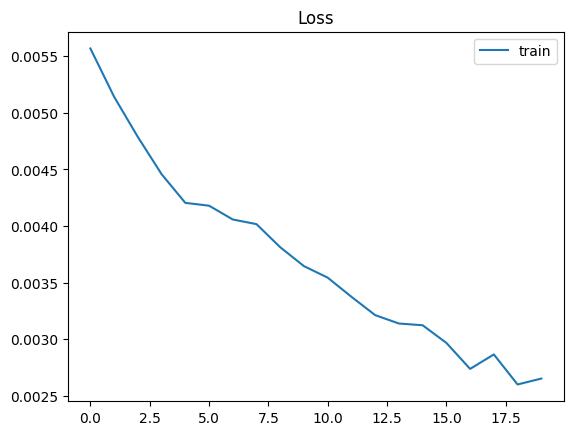

In [ ]:
history_thirty_multivariate_dt = train_multivariate_model(model_thirty_multivariate_dt, X_train_ws_thirty_dt, Y_train_ws_thirty_dt)
plot_loss(history_thirty_multivariate_dt)

In [ ]:
last_sequence_dt = test_data_combined_ws_thirty_scaled_dt[:look_back].reshape(1, look_back, num_features)
print(f"Last sequence shape: {last_sequence_dt.shape}")

Last sequence shape: (1, 36, 14)


In [ ]:

prediction_ws_thirty_dt = model_thirty_multivariate_dt.predict(last_sequence_dt, verbose=0)
print(f"Raw prediction shape: {prediction_ws_thirty_dt.shape}")
print(f"Raw prediction values: {prediction_ws_thirty_dt}")

Raw prediction shape: (1, 30)
Raw prediction values: [[0.05463225 0.04868549 0.05617537 0.05540449 0.06230723 0.07701579
  0.08184506 0.0988588  0.11053672 0.11107291 0.09538302 0.09224696
  0.08740095 0.08727583 0.063099   0.09117794 0.07758969 0.09764695
  0.10328968 0.11492413 0.10603735 0.15094632 0.16951537 0.20559727
  0.23471805 0.22059488 0.22068475 0.19431591 0.14671262 0.12050481]]


In [ ]:
prediction_denormalized_ws_thirty_dt = denormalize_prediction(
    prediction_ws_thirty_dt.flatten(),
    scaler_data_combined_ws_thirty_dt,
    index_of_target_feature,
    num_features
)
print(f"Denormalized prediction for next {params_mv['horizon']} days: {prediction_denormalized_ws_thirty_dt}")

Denormalized prediction for next 30 days: [ 28.65017964  25.77178361  29.39709629  29.02396794  32.36508518
  39.48443981  41.82194291  50.0570709   55.70951137  55.969038
  48.37469357  46.85675582  44.51114939  44.45058897  32.74832376
  46.33931819  39.76222508  49.4705007   52.20173848  57.83313987
  53.53168756  75.26888609  84.25682701 101.72147404 115.81675035
 108.98074008 109.02423915  96.26098193  73.21965535  60.53434447]


In [ ]:
test_data_combined_ws_ninety_dt.shape

(197, 14)

In [ ]:
last_date = test_data_combined_ws_thirty_dt.index[look_back]
prediction_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=params_mv['horizon'], freq='D')
prediction_ws_thirty_dt = pd.DataFrame({
    'DateTime': prediction_dates,
    'Bjelave_PM10': prediction_denormalized_ws_thirty_dt
})
print("\nPrediction results:")
print(prediction_ws_thirty_dt)
print("\nActual results:")
df_test_data_combined_ws_thirty_dt = test_data_combined_ws_thirty_dt['Bjelave_PM10'][look_back:look_back + params_mv['horizon']].reset_index()
print(df_test_data_combined_ws_thirty_dt)


Prediction results:
     DateTime  Bjelave_PM10
0  2022-12-01     28.650180
1  2022-12-02     25.771784
2  2022-12-03     29.397096
3  2022-12-04     29.023968
4  2022-12-05     32.365085
5  2022-12-06     39.484440
6  2022-12-07     41.821943
7  2022-12-08     50.057071
8  2022-12-09     55.709511
9  2022-12-10     55.969038
10 2022-12-11     48.374694
11 2022-12-12     46.856756
12 2022-12-13     44.511149
13 2022-12-14     44.450589
14 2022-12-15     32.748324
15 2022-12-16     46.339318
16 2022-12-17     39.762225
17 2022-12-18     49.470501
18 2022-12-19     52.201738
19 2022-12-20     57.833140
20 2022-12-21     53.531688
21 2022-12-22     75.268886
22 2022-12-23     84.256827
23 2022-12-24    101.721474
24 2022-12-25    115.816750
25 2022-12-26    108.980740
26 2022-12-27    109.024239
27 2022-12-28     96.260982
28 2022-12-29     73.219655
29 2022-12-30     60.534344

Actual results:
     DateTime  Bjelave_PM10
0  2022-11-30     67.309208
1  2022-12-01     44.765450
2  2022-12

In [ ]:
(rmse_ws_thirty_dt, mae_ws_thirty_dt, r2_ws_thirty_dt) = evaluate_forecasts(df_test_data_combined_ws_thirty_dt['Bjelave_PM10'], prediction_ws_thirty_dt['Bjelave_PM10'])
"""
RMSE: 39.90348575818405
MAE: 33.11183869159841
R2 Score: 0.25515581438332535

"""

RMSE: 47.46181989802413
MAE: 37.68586276253177
R2 Score: -0.05380739582106098


'\nRMSE: 39.90348575818405\nMAE: 33.11183869159841\nR2 Score: 0.25515581438332535\n\n'

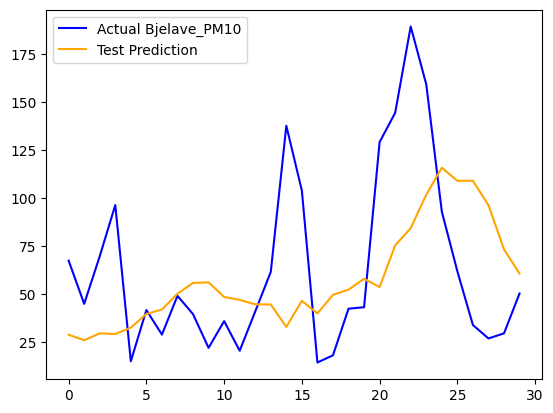

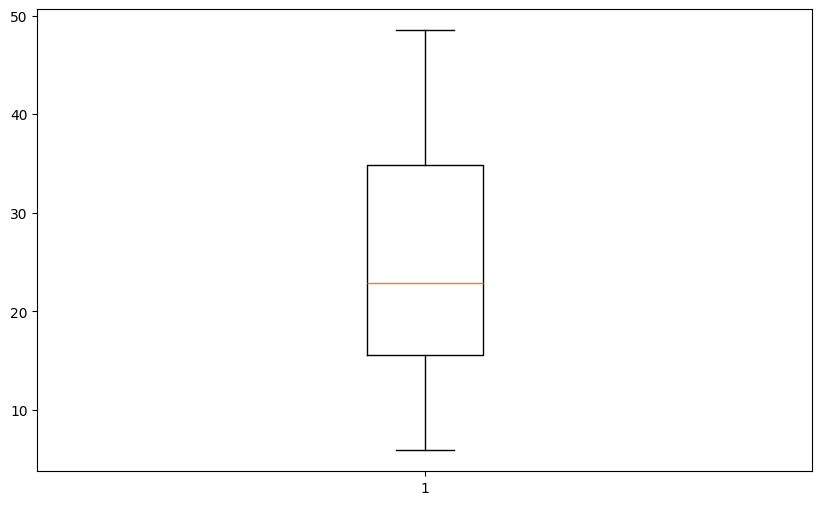

In [ ]:
plt.plot(df_test_data_combined_ws_thirty_dt['Bjelave_PM10'], label='Actual Bjelave_PM10', color='blue')
plt.plot(prediction_ws_thirty_dt['Bjelave_PM10'], label='Test Prediction', color='orange')
plt.legend()
plt.show()

plot_boxplot(prediction_ws_thirty_dt['Bjelave_PM10'], df_test_data_combined_ws_thirty_dt['Bjelave_PM10'][0])

**60-Day Prediction Window (with time features)**

In [ ]:
params_mv['horizon'] = 60
horizon = params_mv['horizon']
look_back=horizon + int(params_mv['horizon']/6 + 1)
#look_back=horizon
num_features = train_data_combined_ws_sixty_scaled_dt.shape[1]
X_train_ws_sixty_dt, Y_train_ws_sixty_dt = create_training_dataset(
    train_data_combined_ws_sixty_scaled_dt,
    index_of_target_feature,
    look_back=look_back,
    horizon=params_mv['horizon']
)
print(f"X_train shape: {X_train_ws_sixty_dt.shape}")
print(f"Y_train shape: {Y_train_ws_sixty_dt.shape}")

X_train shape: (1562, 71, 14)
Y_train shape: (1562, 60)


In [ ]:
look_back

71

In [ ]:
model_sixty_multivariate_dt = build_multivariate_multistep_model(look_back, num_features, params=params_mv)
model_sixty_multivariate_dt.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 71, 70)         │        23,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 71, 70)         │        39,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 71, 70)         │        39,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 50)             │        24,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 60)             │         3,060 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,020 (507.89 KB)

 Trainable params: 130,020 (507.89 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 38s 122ms/step - loss: 0.0074 - mean_absolute_error: 0.0477 - root_mean_squared_error: 0.0858
Epoch 2/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 32s 124ms/step - loss: 0.0055 - mean_absolute_error: 0.0389 - root_mean_squared_error: 0.0739
Epoch 3/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 43s 130ms/step - loss: 0.0050 - mean_absolute_error: 0.0376 - root_mean_squared_error: 0.0705
Epoch 4/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 38s 120ms/step - loss: 0.0047 - mean_absolute_error: 0.0369 - root_mean_squared_error: 0.0684
Epoch 5/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 32s 124ms/step - loss: 0.0048 - mean_absolute_error: 0.0378 - root_mean_squared_error: 0.0690
Epoch 6/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 41s 125ms/step - loss: 0.0046 - mean_absolute_error: 0.0370 - root_mean_squared_error: 0.0681
Epoch 7/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 41s 124ms/step - loss: 0.0041 - mean_absolute_error: 0.0347 - root_mean_squared_error: 0.0640
Epoch 8/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 40s 120ms/step - loss:

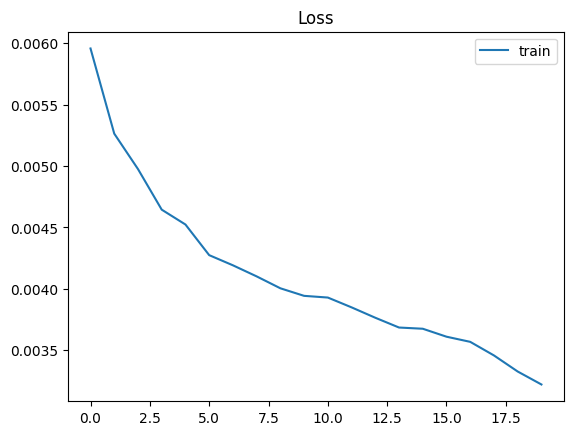

In [ ]:
history_sixty_multivariate_dt = train_multivariate_model(model_sixty_multivariate_dt, X_train_ws_sixty_dt, Y_train_ws_sixty_dt)
plot_loss(history_sixty_multivariate_dt)

In [ ]:
last_sequence_dt = test_data_combined_ws_sixty_scaled_dt[:look_back].reshape(1, look_back, num_features)
print(f"Last sequence shape: {last_sequence_dt.shape}")

Last sequence shape: (1, 71, 14)


In [ ]:
prediction_ws_sixty_dt = model_sixty_multivariate_dt.predict(last_sequence_dt, verbose=0)
print(f"Raw prediction shape: {prediction_ws_sixty_dt.shape}")
print(f"Raw prediction values: {prediction_ws_sixty_dt}")

Raw prediction shape: (1, 60)
Raw prediction values: [[ 0.16702938  0.14439887  0.13259754  0.09749362  0.10973616  0.08895566
   0.05961768  0.05506623  0.05105551  0.06151062  0.05460084  0.05353278
   0.0703986   0.07583655  0.07934381  0.09048904  0.07960316  0.09218991
   0.08816297  0.09729613  0.10255084  0.09442255  0.10436973  0.09776747
   0.11331572  0.11498264  0.08512089  0.06900883  0.05618858  0.04997978
   0.03940491  0.02048121  0.02105886  0.01312093 -0.00151879  0.00726741
   0.01498432  0.02980361  0.03457178  0.04020023  0.04185731  0.06164552
   0.06093112  0.06347196  0.07134268  0.06128872  0.07162777  0.08357081
   0.08393101  0.08228982  0.09430286  0.09216752  0.10227451  0.08385888
   0.08937919  0.07690109  0.07231874  0.0651894   0.06304463  0.07061452]]


In [ ]:
prediction_denormalized_ws_sixty_dt = denormalize_prediction(
    prediction_ws_sixty_dt.flatten(),
    scaler_data_combined_ws_sixty_dt,
    index_of_target_feature,
    num_features
)
print(f"Denormalized prediction for next {params_mv['horizon']} days: {prediction_denormalized_ws_sixty_dt}")

Denormalized prediction for next 60 days: [83.05353803 72.09973657 66.38756151 49.39628326 55.32201557 45.26367022
 31.06326876 28.8602406  26.91893709 31.97950251 28.63497733 28.11800671
 36.28153542 38.91365434 40.61126825 46.00587345 40.73679958 46.82913886
 44.87998987 49.30069134 51.84412078 47.90979957 52.72451342 49.52883604
 57.05462491 57.86146006 43.40753465 35.60885064 29.40348664 26.3982574
 21.27972448 12.12012057 12.3997198   8.5575429   1.47150857  5.72427416
  9.4594741  16.63242541 18.94035152 21.66467785 22.4667527  32.04479979
 31.69900892 32.9288474  36.73849919 31.8721     36.87648664 42.65725333
 42.83159939 42.03722036 47.85186814 46.81830196 51.71036711 42.79669051
 45.46867335 39.42892459 37.21093754 33.76013681 32.72200867 36.38604569]


In [ ]:
prediction_denormalized_ws_sixty_dt.shape

(60,)

In [ ]:
test_data_combined_ws_sixty_dt.shape[0]-look_back

63

In [ ]:
last_date = test_data_combined_ws_sixty_dt.index[look_back]
prediction_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=params_mv['horizon'], freq='D')
prediction_ws_sixty_dt = pd.DataFrame({
    'DateTime': prediction_dates,
    'Bjelave_PM10': prediction_denormalized_ws_sixty_dt
})
print("\nPrediction results:")
print(prediction_ws_thirty_dt)
print("\nActual results:")
df_test_data_combined_ws_sixty_dt = test_data_combined_ws_sixty_dt['Bjelave_PM10'][look_back:look_back + params_mv['horizon']].reset_index()
print(df_test_data_combined_ws_sixty_dt)


Prediction results:
     DateTime  Bjelave_PM10
0  2022-12-01     28.650180
1  2022-12-02     25.771784
2  2022-12-03     29.397096
3  2022-12-04     29.023968
4  2022-12-05     32.365085
5  2022-12-06     39.484440
6  2022-12-07     41.821943
7  2022-12-08     50.057071
8  2022-12-09     55.709511
9  2022-12-10     55.969038
10 2022-12-11     48.374694
11 2022-12-12     46.856756
12 2022-12-13     44.511149
13 2022-12-14     44.450589
14 2022-12-15     32.748324
15 2022-12-16     46.339318
16 2022-12-17     39.762225
17 2022-12-18     49.470501
18 2022-12-19     52.201738
19 2022-12-20     57.833140
20 2022-12-21     53.531688
21 2022-12-22     75.268886
22 2022-12-23     84.256827
23 2022-12-24    101.721474
24 2022-12-25    115.816750
25 2022-12-26    108.980740
26 2022-12-27    109.024239
27 2022-12-28     96.260982
28 2022-12-29     73.219655
29 2022-12-30     60.534344

Actual results:
     DateTime  Bjelave_PM10
0  2022-10-30     38.280050
1  2022-10-31     44.296346
2  2022-11

In [ ]:
(rmse_ws_sixty_dt, mae_ws_sixty_dt, r2_ws_sixty_dt) = evaluate_forecasts(df_test_data_combined_ws_sixty_dt['Bjelave_PM10'], prediction_ws_sixty_dt['Bjelave_PM10'])
"""
RMSE: 11.961889153079229
MAE: 9.526326950984705
R2 Score: 0.2611057693273542
"""


RMSE: 46.27097923915306
MAE: 33.01811707931739
R2 Score: -0.3647755986272445


'\nRMSE: 11.961889153079229\nMAE: 9.526326950984705\nR2 Score: 0.2611057693273542\n'

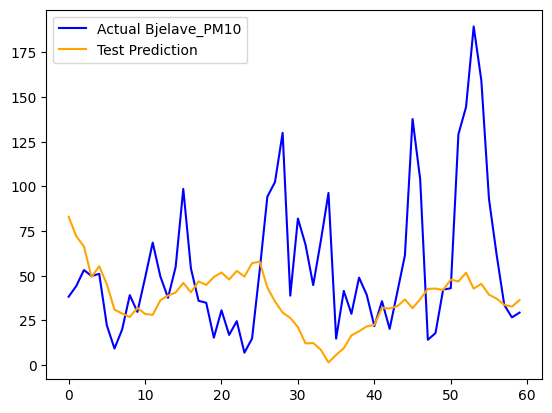

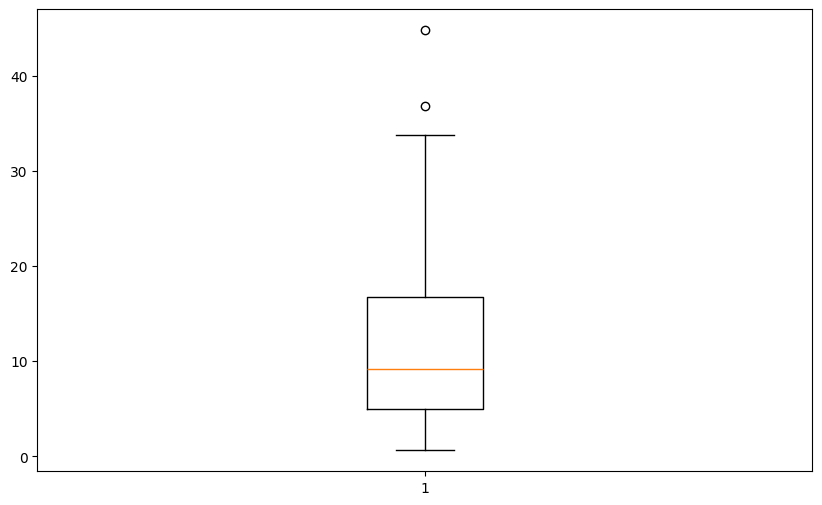

In [ ]:
plt.plot(df_test_data_combined_ws_sixty_dt['Bjelave_PM10'], label='Actual Bjelave_PM10', color='blue')
plt.plot(prediction_ws_sixty_dt['Bjelave_PM10'], label='Test Prediction', color='orange')
plt.legend()
plt.show()

plot_boxplot(prediction_ws_sixty_dt['Bjelave_PM10'], df_test_data_combined_ws_sixty_dt['Bjelave_PM10'][0])

**90-Day Prediction Window (with time features)**

In [ ]:
params_mv['horizon'] = 90
horizon = params_mv['horizon']
look_back=horizon + int(params_mv['horizon']/6 + 1)
#look_back=horizon
num_features = train_data_combined_ws_ninety_scaled_dt.shape[1]
X_train_ws_ninety_dt, Y_train_ws_ninety_dt = create_training_dataset(
    train_data_combined_ws_ninety_scaled_dt,
    index_of_target_feature,
    look_back=look_back,
    horizon=params_mv['horizon']
)
print(f"X_train_ws_ninety_dt shape: {X_train_ws_ninety_dt.shape}")
print(f"Y_train_ws_ninety_dt shape: {Y_train_ws_ninety_dt.shape}")

X_train_ws_ninety_dt shape: (1434, 106, 14)
Y_train_ws_ninety_dt shape: (1434, 90)


In [ ]:
model_ninety_multivariate_dt = build_multivariate_multistep_model(look_back, num_features, params=params_mv)
model_ninety_multivariate_dt.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 106, 70)        │        23,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 106, 70)        │        39,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 106, 70)        │        39,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 50)             │        24,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 90)             │         4,590 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 131,550 (513.87 KB)

 Trainable params: 131,550 (513.87 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 39s 137ms/step - loss: 0.0073 - mean_absolute_error: 0.0473 - root_mean_squared_error: 0.0851
Epoch 2/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 43s 145ms/step - loss: 0.0054 - mean_absolute_error: 0.0393 - root_mean_squared_error: 0.0735
Epoch 3/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 39s 137ms/step - loss: 0.0056 - mean_absolute_error: 0.0399 - root_mean_squared_error: 0.0745
Epoch 4/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 32s 136ms/step - loss: 0.0050 - mean_absolute_error: 0.0380 - root_mean_squared_error: 0.0703
Epoch 5/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 34s 141ms/step - loss: 0.0050 - mean_absolute_error: 0.0387 - root_mean_squared_error: 0.0707
Epoch 6/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 41s 142ms/step - loss: 0.0046 - mean_absolute_error: 0.0370 - root_mean_squared_error: 0.0679
Epoch 7/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 42s 145ms/step - loss: 0.0048 - mean_absolute_error: 0.0373 - root_mean_squared_error: 0.0690
Epoch 8/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 39s 139ms/step - loss:

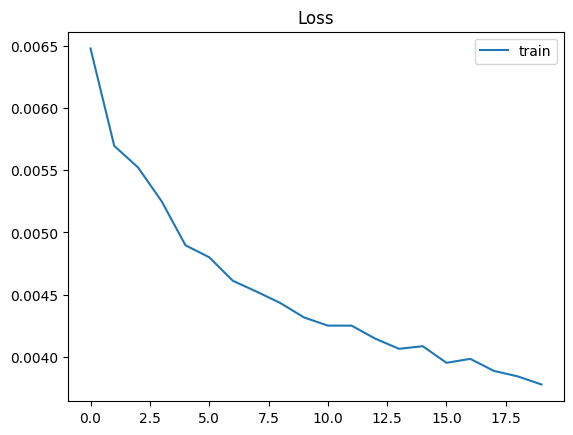

In [ ]:
history_ninety_multivariate_dt = train_multivariate_model(model_ninety_multivariate_dt, X_train_ws_ninety_dt, Y_train_ws_ninety_dt)
plot_loss(history_ninety_multivariate_dt)

In [ ]:
train_data_combined_ws_ninety_scaled

array([[0.10141277],
       [0.10141277],
       [0.1221806 ],
       ...,
       [0.02145475],
       [0.02669768],
       [0.03228362]])

In [ ]:
look_back

106

In [ ]:
90+int(90/6 +1)

106

In [ ]:
test_data_combined_ws_ninety_scaled_dt.shape

(197, 14)

In [ ]:
last_sequence = test_data_combined_ws_ninety_scaled_dt[:look_back].reshape(1, look_back, num_features)
print(f"Last sequence shape: {last_sequence.shape}")

Last sequence shape: (1, 106, 14)


In [ ]:
prediction_ws_ninety_dt = model_ninety_multivariate_dt.predict(last_sequence_dt, verbose=0)
print(f"Raw prediction shape: {prediction_ws_ninety_dt.shape}")
print(f"Raw prediction values: {prediction_ws_ninety_dt}")

Raw prediction shape: (1, 90)
Raw prediction values: [[ 0.07358831  0.08136255  0.09517205  0.05361631  0.04603714  0.06755512
   0.05523954  0.0687289   0.03911001  0.06690277  0.07839723  0.06862321
   0.05257112  0.06777968  0.09137626  0.09522254  0.07123139  0.07238699
   0.08347674  0.03386996  0.03465048  0.0314841   0.10219019  0.0983079
   0.13288784  0.14783329  0.17231609  0.1612843   0.1636925   0.16851345
   0.14788902  0.10635547  0.08468291  0.05825667  0.00152794 -0.00342529
  -0.02101191 -0.01266915  0.00447137 -0.02212109  0.03369524  0.06903298
   0.11820227  0.11742807  0.16592473  0.22464648  0.23741946  0.23547663
   0.2308369   0.23188153  0.18308784  0.1709098   0.13192233  0.12231484
   0.10654455  0.08574027  0.10572299  0.11043674  0.06744318  0.11029853
   0.08390217  0.07037427  0.08297732  0.07529952  0.04217262  0.05959356
   0.05888426  0.03639324  0.02131742  0.06353126  0.08814604  0.11228409
   0.10951465  0.18562359  0.19852479  0.22613354  0.2876536

In [ ]:
prediction_denormalized_ws_ninety_dt = denormalize_prediction(
    prediction_ws_ninety_dt.flatten(),
    scaler_data_combined_ws_ninety_dt,
    index_of_target_feature,
    num_features
)
print(f"Denormalized prediction for next {params_mv['horizon']} days: {prediction_denormalized_ws_ninety_dt}")

Denormalized prediction for next 90 days: [ 37.82544566  41.588396    48.27257787  28.15843682  24.48990636
  34.90521306  28.9441265   35.47335513  21.13698213  34.58945717
  40.15309638  35.42219991  27.65253751  35.01390663  46.43531041
  48.2970177   36.68462843  37.24397476  42.61172392  18.60065167
  18.97844656  17.44582761  51.66955473  49.79041824  66.52807698
  73.76209178  85.61245288  80.27275704  81.43839636  83.77186762
  73.78906683  53.68566891  43.19554252  30.40450425   2.94621051
   0.54870597  -7.96370781  -3.92558136   4.37090944  -8.50058515
  18.51608057  35.62053862  59.41984955  59.0451164   82.51885512
 110.94182589 117.12430438 116.18392111 113.93816202 114.44379266
  90.826282    84.93177294  66.06074513  61.41044923  53.77718572
  43.70733271  53.379531    55.66111497  34.85102856  55.5942183
  42.81763945  36.26976089  42.36998712  38.6537166   22.61937268
  31.0515934   30.70827464  19.82199013  12.52487247  32.95755347
  44.87179277  56.55528363  55.2148

In [ ]:
last_date = test_data_combined_ws_ninety_dt.index[look_back]
prediction_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=params_mv['horizon'], freq='D')
prediction_ws_ninety_dt = pd.DataFrame({
    'DateTime': prediction_dates,
    'Bjelave_PM10': prediction_denormalized_ws_ninety_dt
})
print("\nPrediction results:")
print(prediction_ws_ninety_dt)
print("\nActual results:")
df_test_data_combined_ws_ninety_dt = test_data_combined_ws_ninety_dt['Bjelave_PM10'][look_back:look_back + params_mv['horizon']].reset_index()
print(df_test_data_combined_ws_ninety_dt)


Prediction results:
     DateTime  Bjelave_PM10
0  2022-10-03     37.825446
1  2022-10-04     41.588396
2  2022-10-05     48.272578
3  2022-10-06     28.158437
4  2022-10-07     24.489906
..        ...           ...
85 2022-12-27     91.667326
86 2022-12-28     73.456336
87 2022-12-29     74.811558
88 2022-12-30     73.731431
89 2022-12-31     56.347796

[90 rows x 2 columns]

Actual results:
     DateTime  Bjelave_PM10
0  2022-10-02     13.042623
1  2022-10-03     13.615046
2  2022-10-04     15.149664
3  2022-10-05     18.742900
4  2022-10-06     20.770045
..        ...           ...
85 2022-12-26     33.717604
86 2022-12-27     26.714598
87 2022-12-28     29.372987
88 2022-12-29     50.187371
89 2022-12-30     67.841704

[90 rows x 2 columns]


In [ ]:
(rmse_ws_ninety_dt, mae_ws_ninety_dt, r2_ws_ninety_dt) = evaluate_forecasts(df_test_data_combined_ws_ninety_dt['Bjelave_PM10'], prediction_ws_ninety_dt['Bjelave_PM10'])

RMSE: 42.536503702599404
MAE: 31.80219275688328
R2 Score: -0.5242535925778722


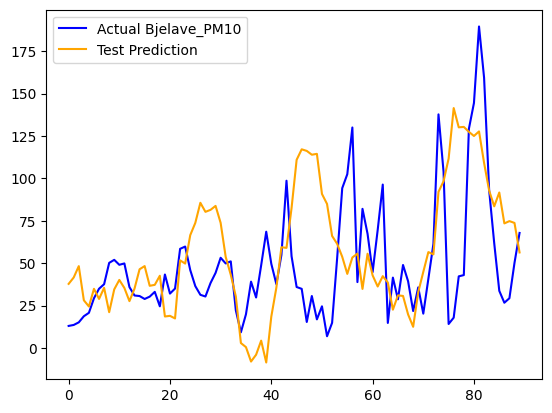

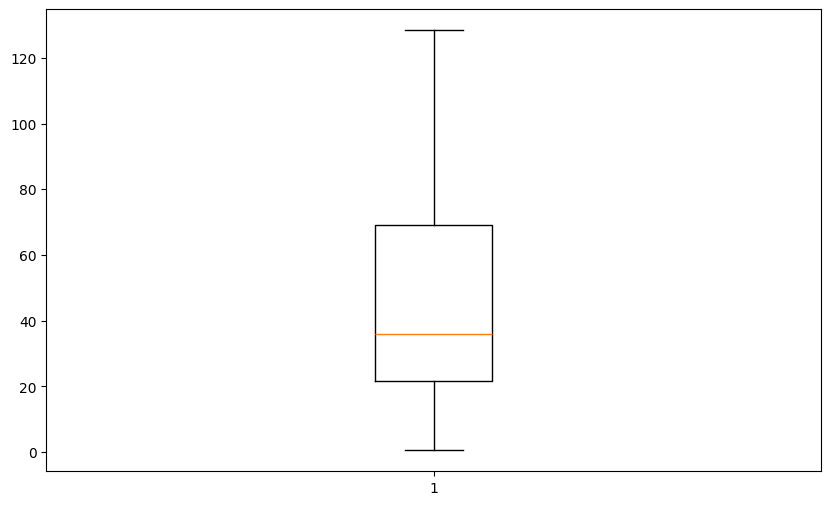

In [ ]:
plt.plot(df_test_data_combined_ws_ninety_dt['Bjelave_PM10'], label='Actual Bjelave_PM10', color='blue')
plt.plot(prediction_ws_ninety_dt['Bjelave_PM10'], label='Test Prediction', color='orange')
plt.legend()
plt.show()

plot_boxplot(prediction_ws_ninety_dt['Bjelave_PM10'], df_test_data_combined_ws_ninety_dt['Bjelave_PM10'][0])

# LSTM for Multivariate Time Series Prediction

In [195]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='train')
    # plt.plot(history.history['val_loss'], label='val')
    plt.title("Loss")
    plt.legend()
    plt.show()

def create_training_dataset_single_step(data, look_back=15):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), :])
        Y.append(data[i + look_back, :])
    return np.array(X), np.array(Y)

def train_multivariate_model(model, x_train, y_train):
    early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
    # x_val = x_train[-50:]
    # y_val = y_train[-50:]
    # x_train = x_train[:-50]
    # y_train = y_train[:-50]
    # history = model.fit(x_train, y_train, epochs=5, batch_size=256, validation_data=(x_val, y_val), callbacks=[early_stop])
    history = model.fit(x_train, y_train, epochs=20, batch_size=6, verbose=1, callbacks=[early_stop])
    return history

def denormalize_predictions_single_step(predictions, scaler):
    return scaler.inverse_transform(predictions)

def evaluate_forecasts(actual_data, predicted_data):
  rmse = np.sqrt(mean_squared_error(actual_data, predicted_data))
  mae = mean_absolute_error(actual_data, predicted_data)
  r2 = r2_score(actual_data, predicted_data)
  print("RMSE:", rmse)
  print("MAE:", mae)
  print("R2 Score:", r2)
  return rmse, mae, r2

def build_multivariate_single_step_model(look_back, num_features, params):
    model = Sequential()
    model.add(LSTM(units=params["lstm_units"], return_sequences=True,
                   input_shape=(look_back, num_features)))
    model.add(LSTM(units=params["lstm_units"], return_sequences=True))
    model.add(LSTM(units=params["lstm_units"], return_sequences=True))
    model.add(LSTM(units=params["lstm_units"], return_sequences=True))
    model.add(LSTM(units=params["lstm_units"], return_sequences=True))
    model.add(LSTM(units=params["lstm_units"], return_sequences=True))
    model.add(LSTM(units=params["lstm_units"], return_sequences=True))
    model.add(LSTM(units=params["lstm_units1"], return_sequences=False))
    model.add(Dense(num_features))

    model.compile(loss=params["loss"],
                  optimizer=params["optimizer"],
                  metrics=[RootMeanSquaredError(), MeanAbsoluteError()])

    return model

In [196]:
params_mv = {
	"loss": "mean_squared_error",
	"optimizer": "adam",
  "dropout": 0.2,
	"lstm_units": 70,
	"lstm_units3": 95,
	"lstm_units2": 90,
	"lstm_units1": 55,
	"lstm_units0": 35,
  "horizon": 7
}

In [197]:
params_mv['horizon'] = 30
horizon = params_mv['horizon']
look_back=30
num_features = train_data.shape[1]
X_train, Y_train = create_training_dataset_single_step(
    train_data_scaled, look_back
)
print(f"X_train_ws_week shape: {X_train.shape}")
print(f"Y_train_ws_week shape: {Y_train.shape}")

X_train_ws_week shape: (1735, 30, 11)
Y_train_ws_week shape: (1735, 11)


In [198]:
def walk_forward_multivariate_prediction(model, initial_sequence, num_predictions,
                                       index_of_target_feature, scaler=None):
    all_predictions = []
    target_predictions = []
    current_sequence = initial_sequence.copy()

    for step in range(num_predictions):
        next_prediction = model.predict(current_sequence, verbose=0)
        all_predictions.append(next_prediction[0])

        target_predictions.append(next_prediction[0, index_of_target_feature])

        new_step = next_prediction.reshape(1, 1, -1)
        current_sequence = np.concatenate([current_sequence[:, 1:, :], new_step], axis=1)

    all_predictions = np.array(all_predictions)
    target_predictions = np.array(target_predictions)

    if scaler is not None:
        all_predictions_denorm = scaler.inverse_transform(all_predictions)
        target_predictions_denorm = all_predictions_denorm[:, index_of_target_feature]
        return target_predictions_denorm, all_predictions_denorm
    else:
        return target_predictions, all_predictions

In [199]:
model = build_multivariate_single_step_model(
    look_back=look_back,
    num_features=num_features,
    params=params_mv
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [200]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_33 (LSTM)                  │ (None, 30, 70)         │        22,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_34 (LSTM)                  │ (None, 30, 70)         │        39,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_35 (LSTM)                  │ (None, 30, 70)         │        39,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_36 (LSTM)                  │ (None, 30, 70)         │        39,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_37 (LSTM)                  │ (None, 30, 70)         │        39,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_38 (LSTM)                  │ (None, 30, 70)         │        39,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_39 (LSTM)                  │ (None, 30, 70)         │        39,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_40 (LSTM)                  │ (None, 55)             │        27,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 11)             │           616 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 288,176 (1.10 MB)

 Trainable params: 288,176 (1.10 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
290/290 ━━━━━━━━━━━━━━━━━━━━ 40s 96ms/step - loss: 0.0442 - mean_absolute_error: 0.1457 - root_mean_squared_error: 0.2055
Epoch 2/20
290/290 ━━━━━━━━━━━━━━━━━━━━ 41s 97ms/step - loss: 0.0253 - mean_absolute_error: 0.1089 - root_mean_squared_error: 0.1589
Epoch 3/20
290/290 ━━━━━━━━━━━━━━━━━━━━ 28s 97ms/step - loss: 0.0237 - mean_absolute_error: 0.1047 - root_mean_squared_error: 0.1540
Epoch 4/20
290/290 ━━━━━━━━━━━━━━━━━━━━ 41s 96ms/step - loss: 0.0232 - mean_absolute_error: 0.1041 - root_mean_squared_error: 0.1523
Epoch 5/20
290/290 ━━━━━━━━━━━━━━━━━━━━ 28s 95ms/step - loss: 0.0235 - mean_absolute_error: 0.1040 - root_mean_squared_error: 0.1534
Epoch 6/20
290/290 ━━━━━━━━━━━━━━━━━━━━ 28s 96ms/step - loss: 0.0231 - mean_absolute_error: 0.1035 - root_mean_squared_error: 0.1518
Epoch 7/20
290/290 ━━━━━━━━━━━━━━━━━━━━ 41s 97ms/step - loss: 0.0221 - mean_absolute_error: 0.1006 - root_mean_squared_error: 0.1486
Epoch 8/20
290/290 ━━━━━━━━━━━━━━━━━━━━ 41s 97ms/step - loss: 0.0232 

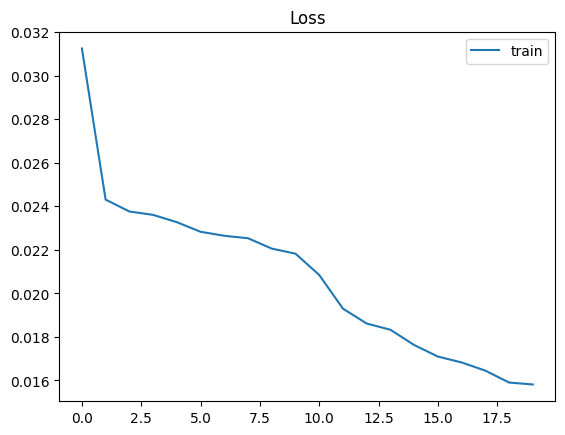

In [201]:
history = train_multivariate_model(model, X_train, Y_train)
plot_loss(history)

In [202]:
print("look_back: ", look_back)

look_back:  30


In [203]:
if isinstance(test_data_scaled, pd.DataFrame):
  test_data_array = test_data_scaled.values
else:
  test_data_array = test_data_scaled
  last_sequence = test_data_array[:look_back].reshape(1, look_back, num_features)
  print(f"Using first {look_back} steps from test data as initial sequence")


print(f"Last sequence shape: {last_sequence.shape}")

Using first 30 steps from test data as initial sequence
Last sequence shape: (1, 30, 11)


In [204]:
print(f"Target feature index: {index_of_target_feature}")

num_predictions_tw = 15
num_predictions_mo = len(test_data_array) - look_back
print(f"1. Number of predictions to make: {num_predictions_tw}")
print(f"2. Number of predictions to make: {num_predictions_mo}")

Target feature index: 8
1. Number of predictions to make: 15
2. Number of predictions to make: 31


In [205]:
def plot_target_predictions(actual_target, predicted_target, target_name="Bjelave_PM10"):
  plt.figure(figsize=(10, 6))
  plt.plot(actual_target, label='Actual', marker='o', linewidth=2, markersize=4)
  plt.plot(predicted_target, label='Predicted', marker='s', linewidth=2, markersize=4)
  plt.title('Actual vs Predicted ' + target_name)
  plt.xlabel('Date')
  plt.ylabel(target_name)
  plt.legend()
  plt.grid(True, alpha=0.3)
  plt.show()

def plot_all_predictions(actual, predicted, feature_names=None):
    num_features = actual.shape[1]
    fig, axes = plt.subplots(num_features, 1, figsize=(12, 3*num_features))

    if num_features == 1:
        axes = [axes]

    for i in range(num_features):
        feature_name = feature_names[i] if feature_names else f"Feature {i}"
        axes[i].plot(actual[:, i], label=f'Actual {feature_name}', marker='o')
        axes[i].plot(predicted[:, i], label=f'Predicted {feature_name}', marker='s')
        axes[i].set_title(f'{feature_name}')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

In [206]:
target_predictions_tw, all_predictions_tw = walk_forward_multivariate_prediction(
    model=model,
    initial_sequence=last_sequence,
    num_predictions=num_predictions_tw,
    index_of_target_feature=index_of_target_feature,
    scaler=scaler
)
target_predictions_mo, all_predictions_mo= walk_forward_multivariate_prediction(
    model=model,
    initial_sequence=last_sequence,
    num_predictions=num_predictions_mo,
    index_of_target_feature=index_of_target_feature,
    scaler=scaler
)

print(f"1. Target predictions shape: {target_predictions_tw.shape}")
print(f"1. All predictions shape: {all_predictions_tw.shape}")

print(f"2. Target predictions shape: {target_predictions_mo.shape}")
print(f"2. All predictions shape: {all_predictions_mo.shape}")

1. Target predictions shape: (15,)
1. All predictions shape: (15, 11)
2. Target predictions shape: (31,)
2. All predictions shape: (31, 11)


In [207]:
actual_target = test_data_array[look_back:, index_of_target_feature]
actual_full = scaler.inverse_transform(test_data_array[look_back:])
actual_target_denorm = actual_full[:, index_of_target_feature]

In [208]:
actual_target_tw = test_data_array[look_back:look_back+num_predictions_tw , index_of_target_feature]
actual_full_tw = scaler.inverse_transform(test_data_array[look_back:look_back+num_predictions_tw])
actual_target_denorm_tw = actual_full_tw[:, index_of_target_feature]

In [209]:
def plot_target_predictions(dates, actual_target, predicted_target, target_name="Bjelave_PM10"):
  plt.figure(figsize=(15, 6))
  plt.plot(dates, actual_target, label='Actual', marker='o', linewidth=2, markersize=4)
  plt.plot(dates, predicted_target, label='Predicted', marker='s', linewidth=2, markersize=4)
  plt.title('Actual vs Predicted -'+target_name)
  plt.xlabel('Date')
  plt.ylabel('Value')
  plt.legend()
  plt.grid(True, alpha=0.3)
  plt.tick_params(axis='x', rotation=45)
  plt.tight_layout()
  plt.show()

In [210]:
(test_data[look_back:look_back+num_predictions_tw].index).shape
actual_target.shape

(31,)

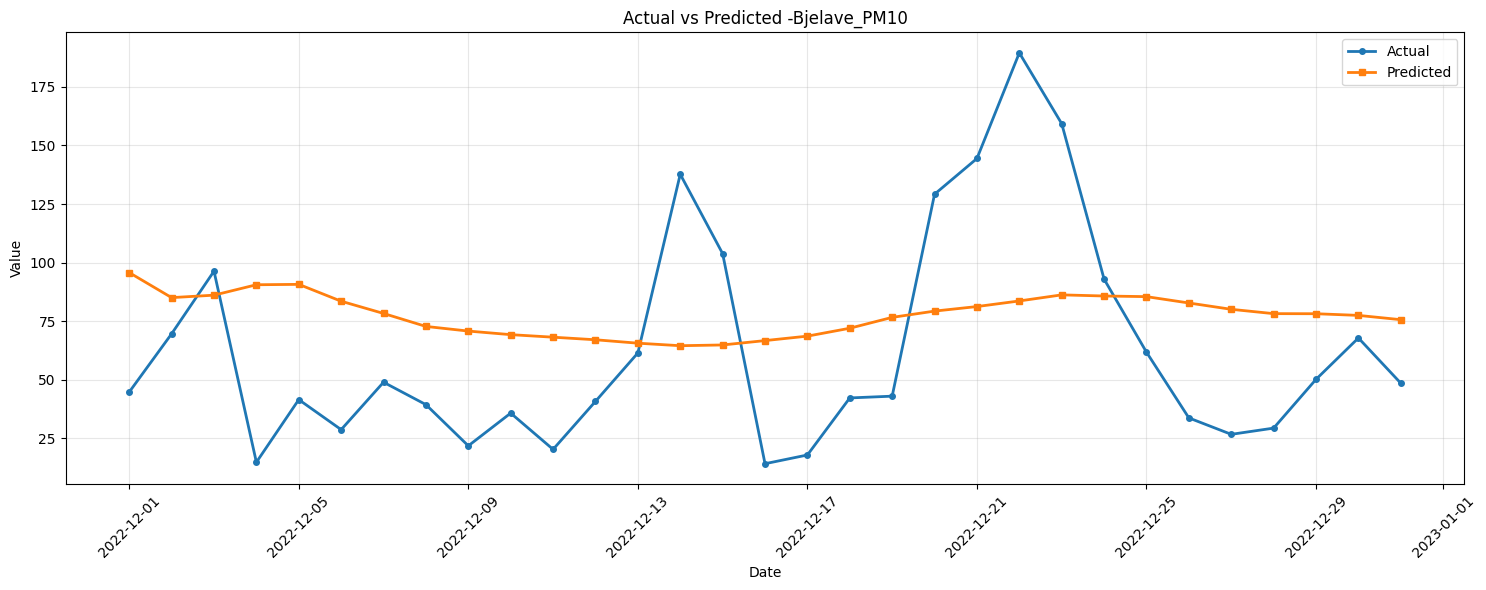

In [211]:
dates = test_data[look_back:look_back+num_predictions_mo].index
plot_target_predictions(dates, actual_target_denorm, target_predictions_mo, target_name="Bjelave_PM10")

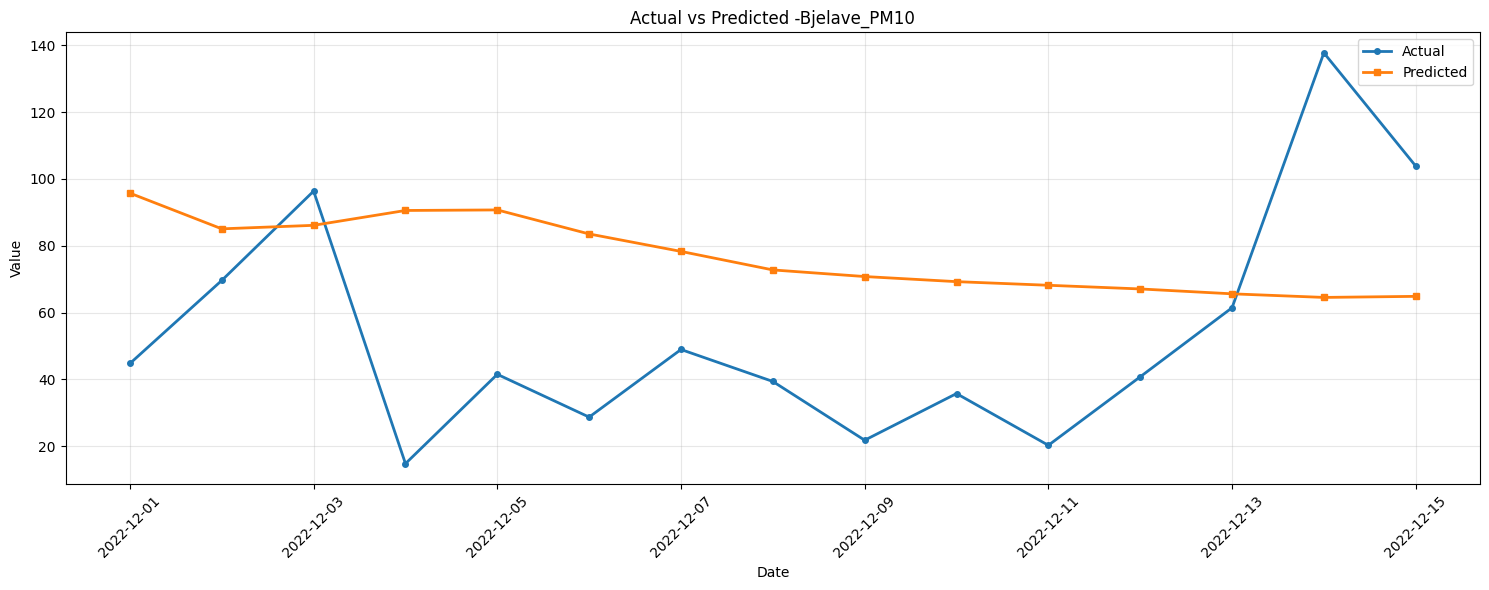

In [212]:
dates = test_data[look_back:look_back+num_predictions_tw].index
plot_target_predictions(dates, actual_target_denorm_tw, target_predictions_tw, target_name="Bjelave_PM10")

In [213]:
(rmse, mae, r2) = evaluate_forecasts(actual_target_denorm_tw, target_predictions_tw)

RMSE: 44.32947304732661
MAE: 39.47449911965264
R2 Score: -0.742170194701151


In [214]:
(rmse, mae, r2) = evaluate_forecasts(actual_target_denorm, target_predictions_mo)

RMSE: 47.42354247078247
MAE: 41.86006609697023
R2 Score: -0.08339512590215836
